In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('update_kurinji.csv')
data = data.drop([0])
data = data.drop(axis=0,columns=['Silica (mg/L)','Sodium (mg/L)','Potassium (mg/L)'])
data

Date    pH  Electrical Conductivity @ 25C (µs/cm)  TDS (mg/L)  \
1  24.11.2021  6.83                                 2006.0      1256.0   
2  22.09.2021  6.64                                 2014.0      1288.0   
3  24.06.2019  6.51                                 1528.0       947.0   
4  10.10.2018  5.86                                 1120.0       694.0   
5  23.10.2017  6.73                                 1190.0       738.0   
6  21.11.2016  6.14                                 1025.0       645.0   

   Alkalinity (mg/L)  Hardness (mg/L)  Calcium (mg/L)  Magnesium (mg/L)  \
1              201.0            395.0            96.7              37.3   
2              213.0            408.0            95.2              41.3   
3              158.0            308.0            72.9              30.6   
4              106.0            234.0            60.2              20.4   
5              202.0            268.0            78.8              17.3   
6              152.0            236.0            61.5              20.1   

   Iron (mg/L)  Chloride (mg/L)  Sulphate (mg/L)  Nitrate (mg/L)  \
1         0.10            464.0            121.0            23.8   
2         0.10            506.0             59.3            22.7   
3         0.16            364.0             40.4            23.5   
4         0.11            265.0             19.4            48.4   
5         0.01            224.0             34.1             5.4   
6         0.09            188.0            110.0            42.3   

   Fluoride (mg/L)  
1             0.63  
2             0.37  
3             0.20  
4             0.16  
5             0.20  
6             0.51

In [3]:
# import pandas as pd
# import random
# from datetime import datetime, timedelta

# # Load your existing dataset
# data = {
#     'Date': ['24.11.2021', '22.09.2021', '24.06.2019', '10.10.2018', '23.10.2017', '21.11.2016'],
#     'pH': [6.83, 6.64, 6.51, 5.86, 6.73, 6.14],
#     'Electrical Conductivity @ 25C (µs/cm)': [2006.0, 2014.0, 1528.0, 1120.0, 1190.0, 1025.0],
#     'TDS (mg/L)': [1256.0, 1288.0, 947.0, 694.0, 738.0, 645.0],
#     'Alkalinity (mg/L)': [201.0, 213.0, 158.0, 106.0, 202.0, 152.0],
#     'Hardness (mg/L)': [395.0, 408.0, 308.0, 234.0, 268.0, 236.0],
#     'Calcium (mg/L)': [96.7, 95.2, 72.9, 60.2, 78.8, 61.5],
#     'Magnesium (mg/L)': [37.3, 41.3, 30.6, 20.4, 17.3, 20.1],
#     'Iron (mg/L)': [0.10, 0.10, 0.16, 0.11, 0.01, 0.09],
#     'Chloride (mg/L)': [464.0, 506.0, 364.0, 265.0, 224.0, 188.0],
#     'Sulphate (mg/L)': [121.0, 59.3, 40.4, 19.4, 34.1, 110.0],
#     'Nitrate (mg/L)': [23.8, 22.7, 23.5, 48.4, 5.4, 42.3],
#     'Fluoride (mg/L)': [0.63, 0.37, 0.20, 0.16, 0.20, 0.51]
# }

# df = pd.DataFrame(data)

# # Convert 'Date' column to datetime
# df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# # Function to generate random values within the ranges of existing data
# def generate_random_value(min_value, max_value):
#     return random.uniform(min_value, max_value)

# # Function to generate 52 rows between each existing row
# def generate_weekly_data(df):
#     new_rows = []
#     for i in range(len(df) - 1):
#         start_date = df.iloc[i]['Date']
#         end_date = df.iloc[i + 1]['Date']
#         date_diff = (end_date - start_date).days
#         for j in range(1, 53):
#             new_date = start_date + timedelta(weeks=j)
#             new_row = {'Date': new_date}
#             for column in df.columns[1:]:
#                 min_value = df.iloc[i][column]
#                 max_value = df.iloc[i + 1][column]
#                 new_row[column] = generate_random_value(min_value, max_value)
#             new_rows.append(new_row)
#     return new_rows

# # Generate 52 rows between each existing row
# new_data = generate_weekly_data(df)

# # Append the new data to the existing DataFrame
# new_df = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

# # Sort the DataFrame by 'Date' column
# new_df.sort_values(by='Date', inplace=True)
# new_df.to_csv('generated_kurinji.csv')
# # Output the DataFrame with the new weekly values
# print(new_df)


In [4]:
df = pd.read_csv('generated_kurinji.csv')
df

Date        pH  Electrical Conductivity @ 25C (µs/cm)   TDS (mg/L)  \
0    11/21/2016  6.140000                            1025.000000   645.000000   
1    10/23/2017  6.730000                            1190.000000   738.000000   
2    10/30/2017  6.274682                            1104.189703   665.589073   
3     11/6/2017  6.346554                            1123.953669   710.276227   
4    11/13/2017  6.190552                            1047.391541   692.776109   
..          ...       ...                                    ...          ...   
261  10/26/2022  6.702890                            2009.207263  1269.545484   
262   11/2/2022  6.806771                            2007.181761  1262.812308   
263   11/9/2022  6.770573                            2008.652331  1265.745628   
264  11/16/2022  6.757674                            2011.606947  1272.860007   
265  11/23/2022  6.663996                            2010.915863  1284.372178   

     Alkalinity (mg/L)  Hardness (mg/L)  Calcium (mg/L)  Magnesium (mg/L)  \
0           152.000000       236.000000       61.500000         20.100000   
1           202.000000       268.000000       78.800000         17.300000   
2           158.344396       248.307172       74.540219         18.292039   
3           197.831589       252.990524       65.518352         17.497912   
4           177.502351       256.734542       73.585478         17.554232   
..                 ...              ...             ...               ...   
261         204.473762       403.192458       95.916750         40.198052   
262         212.017324       404.473502       95.457232         40.267308   
263         204.755052       404.719861       96.065799         39.384909   
264         204.972609       398.308400       95.602931         40.560547   
265         208.024691       405.307862       96.028354         39.043794   

     Iron (mg/L)  Chloride (mg/L)  Sulphate (mg/L)  Nitrate (mg/L)  \
0       0.090000       188.000000       110.000000       42.300000   
1       0.010000       224.000000        34.100000        5.400000   
2       0.060853       213.993025        64.143158        5.420373   
3       0.021466       219.058281        52.749700       27.762567   
4       0.055771       218.539061        38.130493       31.710137   
..           ...              ...              ...             ...   
261     0.100000       498.529380        67.525081       23.003235   
262     0.100000       499.945009       103.375580       23.308951   
263     0.100000       464.003805       103.124930       23.071376   
264     0.100000       486.549645       106.006551       23.445260   
265     0.100000       469.380901        80.388243       22.791134   

     Fluoride (mg/L)  
0           0.510000  
1           0.200000  
2           0.443722  
3           0.211859  
4           0.418954  
..               ...  
261         0.533801  
262         0.427615  
263         0.543830  
264         0.487595  
265         0.495168  

[266 rows x 13 columns]

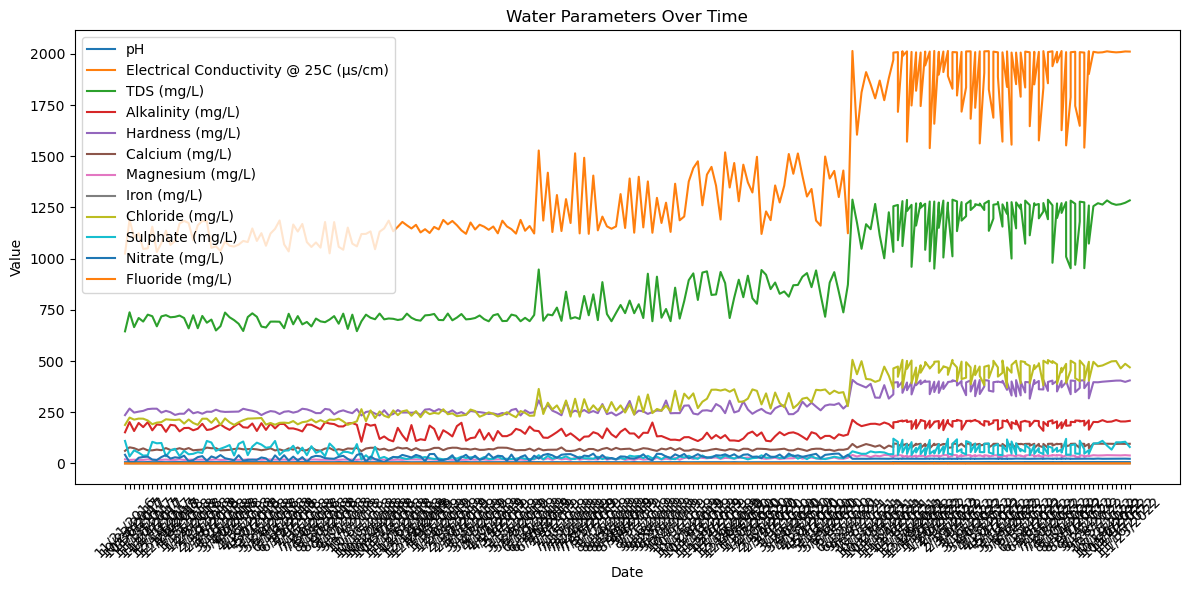

In [5]:
import matplotlib.pyplot as plt
new_df=df
# Assuming new_df is your DataFrame with the new weekly values
plt.figure(figsize=(12, 6))

# Plot each parameter against the date
for column in new_df.columns[1:]:
    plt.plot(new_df['Date'], new_df[column], label=column)

plt.title('Water Parameters Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# !pip install fbprophet

In [7]:
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt

# # Assuming new_df is your DataFrame with the new weekly values
# # Convert 'Date' column to index
# new_df.set_index('Date', inplace=True)

# # Choose a parameter to forecast, let's say 'pH' for demonstration
# parameter = 'pH'

# # Split the data into training and testing sets
# train_size = int(0.8 * len(new_df))
# train_data = new_df.iloc[:train_size][parameter]
# test_data = new_df.iloc[train_size:][parameter]

# # Fit ARIMA model
# model = ARIMA(train_data, order=(5,1,0))  # You can tune the order parameter
# fitted_model = model.fit()

# # Make predictions
# predictions = fitted_model.forecast(steps=len(test_data))

# # Compute evaluation metrics
# mse = mean_squared_error(test_data, predictions)
# print("Mean Squared Error (MSE):", mse)

# # Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(new_df.index[train_size:], test_data, label='Actual')
# plt.plot(new_df.index[train_size:], predictions, label='Predicted')
# plt.title(f'{parameter} Forecasting with ARIMA (MSE: {mse:.2f})')
# plt.xlabel('Date')
# plt.ylabel(parameter)
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [8]:
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# # Define a function to train ARIMA model, make predictions, and compute MSE
# def train_arima_and_evaluate(train_data, test_data):
#     model = ARIMA(train_data, order=(5,1,0))  # You can tune the order parameter
#     fitted_model = model.fit()
#     predictions = fitted_model.forecast(steps=len(test_data))
#     mse = mean_squared_error(test_data, predictions)
#     return predictions, mse

# # Define a function to split data, train models, and evaluate performance for each column
# def fit_and_evaluate_forecasting_models(df):
#     evaluation_results = {}
#     for column in df.columns:
#         if column != 'Date':
#             train_size = int(0.8 * len(df))
#             train_data = df.iloc[:train_size][column]
#             test_data = df.iloc[train_size:][column]
#             predictions, mse = train_arima_and_evaluate(train_data, test_data)
#             evaluation_results[column] = {'predictions': predictions, 'mse': mse}
#     return evaluation_results

# # Assuming new_df is your DataFrame with the new weekly values
# # Convert 'Date' column to index
# new_df.set_index('Date', inplace=True)

# # Fit and evaluate forecasting models for each column
# evaluation_results = fit_and_evaluate_forecasting_models(new_df)

# # Output evaluation results
# for column, results in evaluation_results.items():
#     print(f"{column}:")
#     print("Mean Squared Error (MSE):", results['mse'])
#     print()  # Add a newline for readability


In [9]:
# # Define a function to calculate Mean Absolute Percentage Error (MAPE)
# def mean_absolute_percentage_error(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# # Define a function to train ARIMA model, make predictions, and compute MSE and MAPE
# def train_arima_and_evaluate(train_data, test_data):
#     model = ARIMA(train_data, order=(5,1,0))  # You can tune the order parameter
#     fitted_model = model.fit()
#     predictions = fitted_model.forecast(steps=len(test_data))
#     mse = mean_squared_error(test_data, predictions)
#     mape = mean_absolute_percentage_error(test_data, predictions)
#     return predictions, mse, mape

# # Define a function to split data, train models, and evaluate performance for each column
# def fit_and_evaluate_forecasting_models(df):
#     evaluation_results = {}
#     for column in df.columns:
#         if column != 'Date':
#             train_size = int(0.8 * len(df))
#             train_data = df.iloc[:train_size][column]
#             test_data = df.iloc[train_size:][column]
#             predictions, mse, mape = train_arima_and_evaluate(train_data, test_data)
#             evaluation_results[column] = {'mse': mse, 'mape': mape}
#     return evaluation_results

# # Fit and evaluate forecasting models for each column
# evaluation_results = fit_and_evaluate_forecasting_models(new_df)

# # Output evaluation results
# for column, results in evaluation_results.items():
#     print(f"{column}:")
#     print("Mean Squared Error (MSE):", results['mse'])
#     print("Mean Absolute Percentage Error (MAPE):", results['mape'], "%")
#     print()  # Add a newline for readability


In [10]:

# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define a function to train ARIMA model, make predictions, and compute MSE and MAPE
def train_arima_and_evaluate(train_data, test_data):
    model = ARIMA(train_data, order=(5,1,0))  # You can tune the order parameter
    fitted_model = model.fit()
    predictions = fitted_model.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    mape = mean_absolute_percentage_error(test_data, predictions)
    return predictions, mse, mae, mape

# Define a function to train SARIMA model, make predictions, and compute MSE and MAPE
def train_sarima_and_evaluate(train_data, test_data):
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # You can tune the order parameter
    fitted_model = model.fit()
    predictions = fitted_model.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    mape = mean_absolute_percentage_error(test_data, predictions)
    return predictions, mse, mae, mape

# Define a function to train XGBoost model, make predictions, and compute MSE and MAPE
def train_xgboost_and_evaluate(train_data, test_data):
    model = XGBRegressor()
    model.fit(np.array(range(len(train_data))).reshape(-1, 1), train_data)
    predictions = model.predict(np.array(range(len(train_data), len(train_data) + len(test_data))).reshape(-1, 1))
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    mape = mean_absolute_percentage_error(test_data, predictions)
    return predictions, mse, mae, mape

# Define a function to split data, train models, and evaluate performance for each column
def fit_and_evaluate_forecasting_models(df):
    evaluation_results = {}
    for column in df.columns:
        if column != 'Date':
            train_data, test_data = train_test_split(df[column], test_size=0.2, shuffle=False)
            arima_predictions, arima_mse, arima_mae, arima_mape = train_arima_and_evaluate(train_data, test_data)
            sarima_predictions, sarima_mse, sarima_mae, sarima_mape = train_sarima_and_evaluate(train_data, test_data)
            xgboost_predictions, xgboost_mse, xgboost_mae, xgboost_mape = train_xgboost_and_evaluate(train_data, test_data)
            evaluation_results[column] = {
                'arima_predictions': arima_predictions, 'arima_mse': arima_mse, 'arima_mae': arima_mae, 'arima_mape': arima_mape,
                'sarima_predictions': sarima_predictions, 'sarima_mse': sarima_mse, 'sarima_mae': sarima_mae, 'sarima_mape': sarima_mape,
                'xgboost_predictions': xgboost_predictions, 'xgboost_mse': xgboost_mse, 'xgboost_mae': xgboost_mae, 'xgboost_mape': xgboost_mape
            }
    return evaluation_results

# Fit and evaluate forecasting models for each column
evaluation_results = fit_and_evaluate_forecasting_models(new_df)

# Output evaluation results
for column, results in evaluation_results.items():
    print(f"{column}:")
    print("ARIMA Mean Squared Error (MSE):", results['arima_mse'])
    print("ARIMA Mean Absolute Error (MAE):", results['arima_mae'])
    print("ARIMA Mean Absolute Percentage Error (MAPE):", results['arima_mape'], "%")
    print()
    print("SARIMA Mean Squared Error (MSE):", results['sarima_mse'])
    print("SARIMA Mean Absolute Error (MAE):", results['sarima_mae'])
    print("SARIMA Mean Absolute Percentage Error (MAPE):", results['sarima_mape'], "%")
    print()
    print("XGBoost Mean Squared Error (MSE):", results['xgboost_mse'])
    print("XGBoost Mean Absolute Error (MAE):", results['xgboost_mae'])
    print("XGBoost Mean Absolute Percentage Error (MAPE):", results['xgboost_mape'], "%")
    print()  # Add a newline for readability


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


pH:
ARIMA Mean Squared Error (MSE): 0.010108934573527599
ARIMA Mean Absolute Error (MAE): 0.0869845691282393
ARIMA Mean Absolute Percentage Error (MAPE): 1.3101456092757373 %

SARIMA Mean Squared Error (MSE): 0.013486988951223789
SARIMA Mean Absolute Error (MAE): 0.0977256669509881
SARIMA Mean Absolute Percentage Error (MAPE): 1.4716370835945962 %

XGBoost Mean Squared Error (MSE): 0.01968511954792003
XGBoost Mean Absolute Error (MAE): 0.11459663131619278
XGBoost Mean Absolute Percentage Error (MAPE): 1.7341784878341542 %

Electrical Conductivity @ 25C (µs/cm):
ARIMA Mean Squared Error (MSE): 26142.567440553656
ARIMA Mean Absolute Error (MAE): 123.6748753309557
ARIMA Mean Absolute Percentage Error (MAPE): 7.017124306536123 %

SARIMA Mean Squared Error (MSE): 51111.34412260042
SARIMA Mean Absolute Error (MAE): 170.65521137162884
SARIMA Mean Absolute Percentage Error (MAPE): 9.697186514812957 %

XGBoost Mean Squared Error (MSE): 35555.59671440302
XGBoost Mean Absolute Error (MAE): 110.42

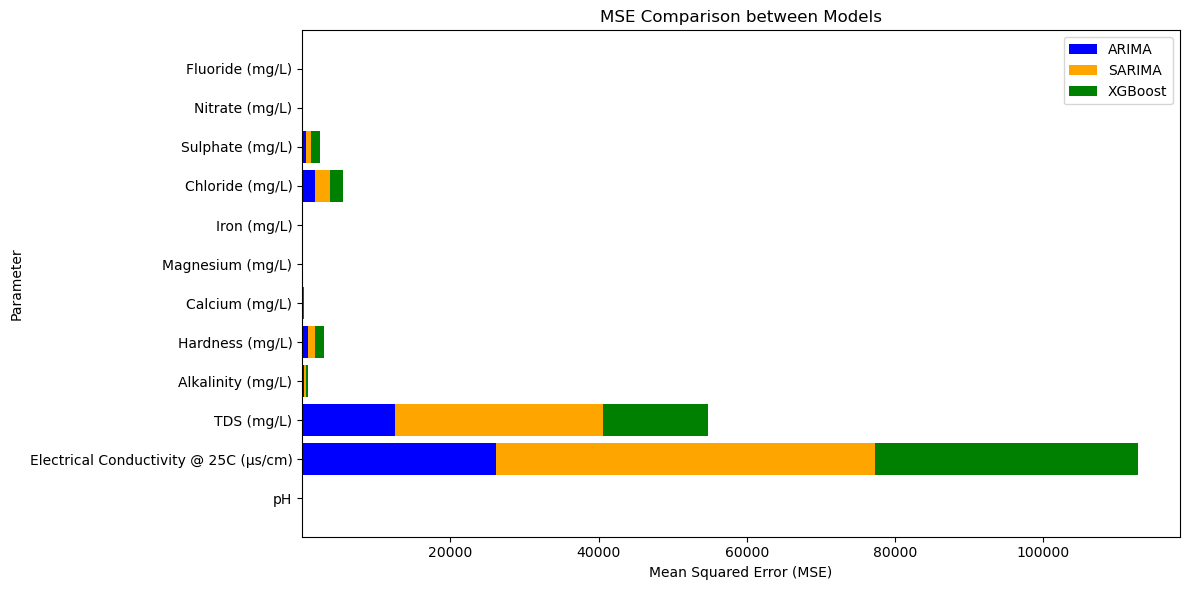

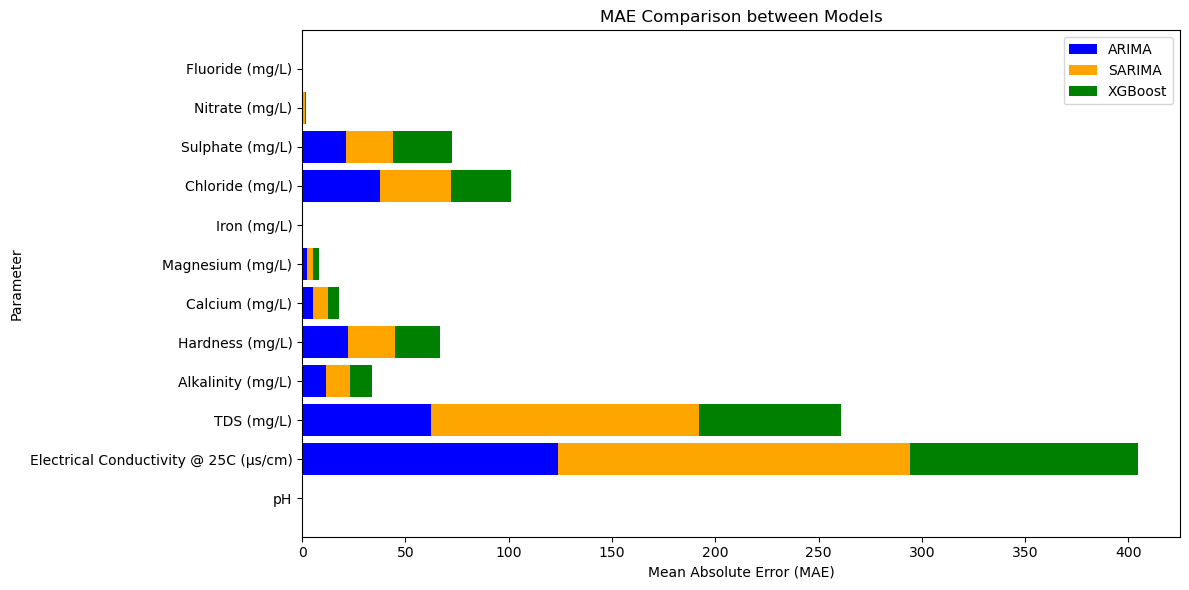

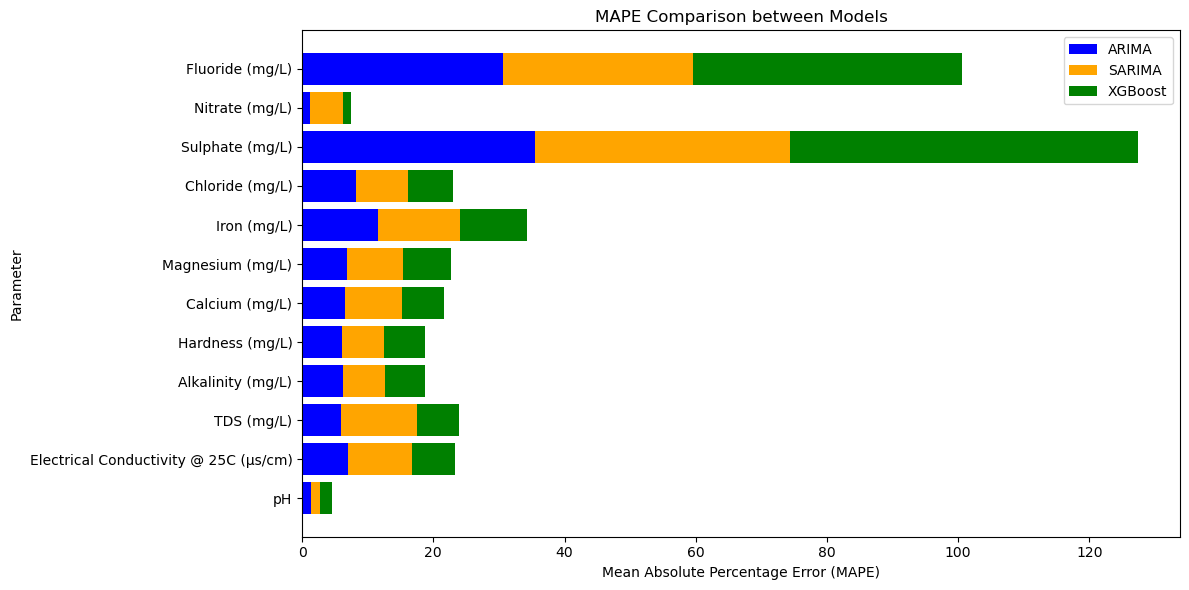

In [11]:
import matplotlib.pyplot as plt

# Extract evaluation results
columns = []
arima_mse = []
sarima_mse = []
xgboost_mse = []
arima_mae = []
sarima_mae = []
xgboost_mae = []
arima_mape = []
sarima_mape = []
xgboost_mape = []

for column, results in evaluation_results.items():
    columns.append(column)
    arima_mse.append(results['arima_mse'])
    sarima_mse.append(results['sarima_mse'])
    xgboost_mse.append(results['xgboost_mse'])
    arima_mae.append(results['arima_mae'])
    sarima_mae.append(results['sarima_mae'])
    xgboost_mae.append(results['xgboost_mae'])
    arima_mape.append(results['arima_mape'])
    sarima_mape.append(results['sarima_mape'])
    xgboost_mape.append(results['xgboost_mape'])

# Plot MSE comparison
plt.figure(figsize=(12, 6))
plt.barh(columns, arima_mse, color='blue', label='ARIMA')
plt.barh(columns, sarima_mse, color='orange', label='SARIMA', left=arima_mse)
plt.barh(columns, xgboost_mse, color='green', label='XGBoost', left=np.array(arima_mse) + np.array(sarima_mse))
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Parameter')
plt.title('MSE Comparison between Models')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MAE comparison
plt.figure(figsize=(12, 6))
plt.barh(columns, arima_mae, color='blue', label='ARIMA')
plt.barh(columns, sarima_mae, color='orange', label='SARIMA', left=arima_mae)
plt.barh(columns, xgboost_mae, color='green', label='XGBoost', left=np.array(arima_mae) + np.array(sarima_mae))
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Parameter')
plt.title('MAE Comparison between Models')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MAPE comparison
plt.figure(figsize=(12, 6))
plt.barh(columns, arima_mape, color='blue', label='ARIMA')
plt.barh(columns, sarima_mape, color='orange', label='SARIMA', left=arima_mape)
plt.barh(columns, xgboost_mape, color='green', label='XGBoost', left=np.array(arima_mape) + np.array(sarima_mape))
plt.xlabel('Mean Absolute Percentage Error (MAPE)')
plt.ylabel('Parameter')
plt.title('MAPE Comparison between Models')
plt.legend()
plt.tight_layout()
plt.show()


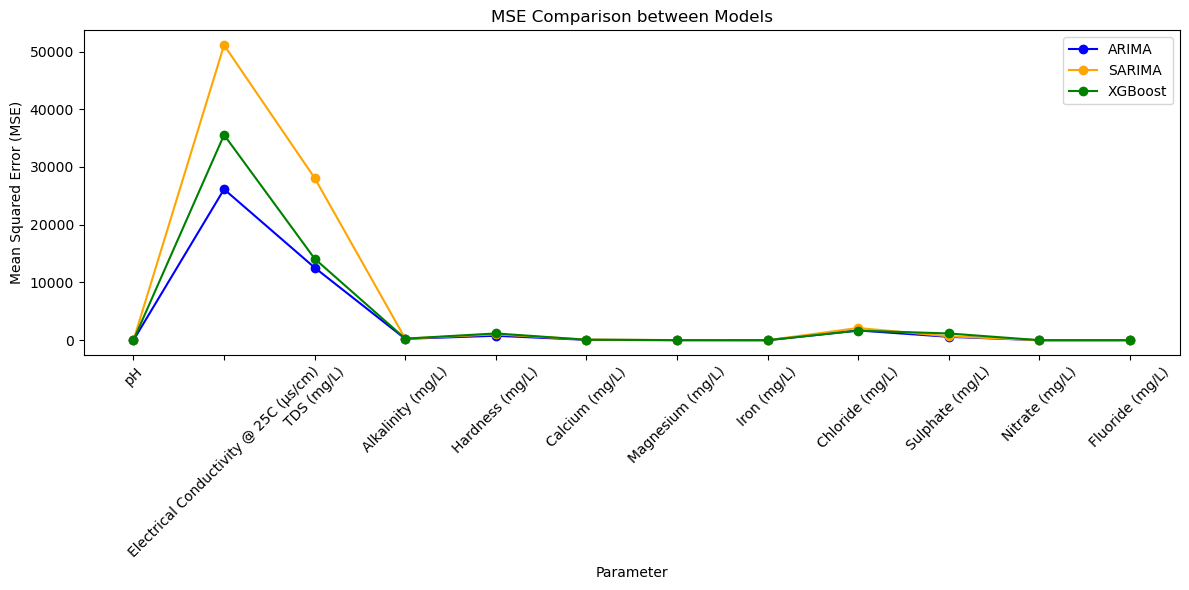

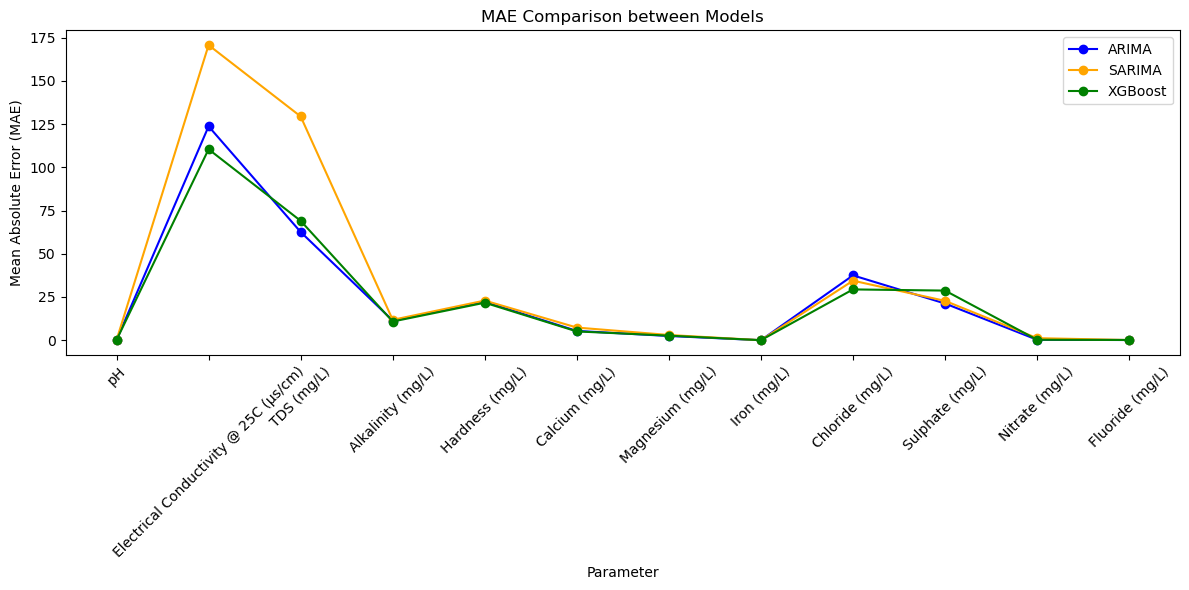

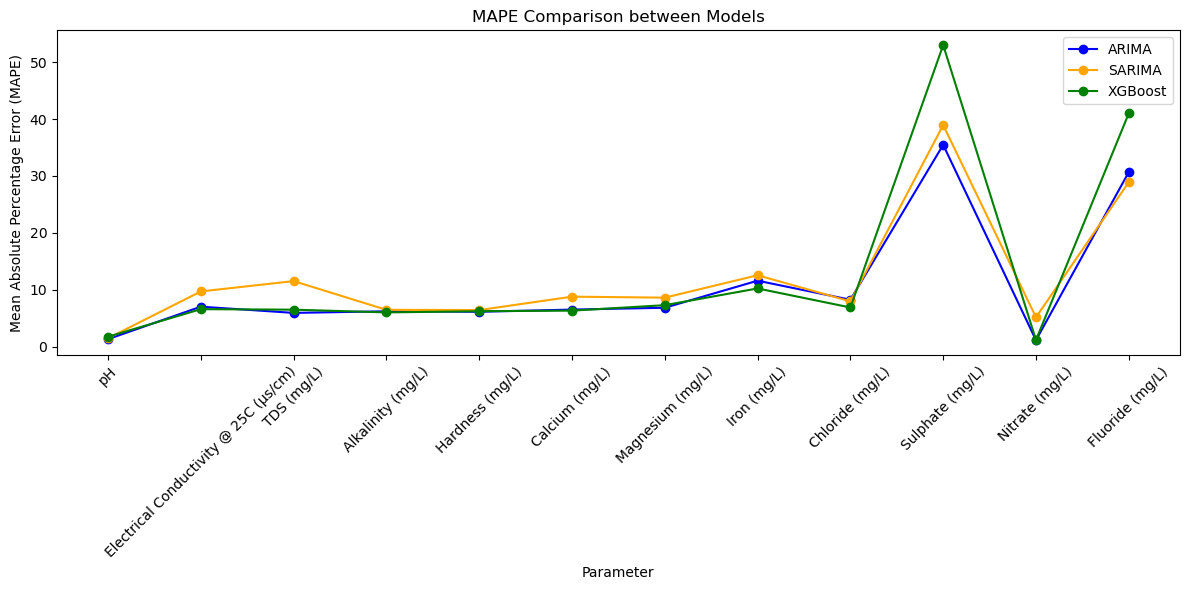

In [12]:
# Plot comparison using line plot
plt.figure(figsize=(12, 6))

# Plot MSE comparison
plt.plot(columns, arima_mse, marker='o', color='blue', label='ARIMA')
plt.plot(columns, sarima_mse, marker='o', color='orange', label='SARIMA')
plt.plot(columns, xgboost_mse, marker='o', color='green', label='XGBoost')

plt.xlabel('Parameter')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison between Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE comparison
plt.figure(figsize=(12, 6))

plt.plot(columns, arima_mae, marker='o', color='blue', label='ARIMA')
plt.plot(columns, sarima_mae, marker='o', color='orange', label='SARIMA')
plt.plot(columns, xgboost_mae, marker='o', color='green', label='XGBoost')

plt.xlabel('Parameter')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison between Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAPE comparison
plt.figure(figsize=(12, 6))

plt.plot(columns, arima_mape, marker='o', color='blue', label='ARIMA')
plt.plot(columns, sarima_mape, marker='o', color='orange', label='SARIMA')
plt.plot(columns, xgboost_mape, marker='o', color='green', label='XGBoost')

plt.xlabel('Parameter')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('MAPE Comparison between Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
print(columns)

['pH', 'Electrical Conductivity @ 25C (µs/cm)', 'TDS (mg/L)', 'Alkalinity (mg/L)', 'Hardness (mg/L)', 'Calcium (mg/L)', 'Magnesium (mg/L)', 'Iron (mg/L)', 'Chloride (mg/L)', 'Sulphate (mg/L)', 'Nitrate (mg/L)', 'Fluoride (mg/L)']


In [14]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_log_error

# Define a function to train ARIMA model, make predictions, and compute additional evaluation metrics
def train_arima_and_evaluate(train_data, test_data):
    model = ARIMA(train_data, order=(5,1,0))  # You can tune the order parameter
    fitted_model = model.fit()
    predictions = fitted_model.forecast(steps=len(test_data))
    
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    medae = median_absolute_error(test_data, predictions)
    evs = explained_variance_score(test_data, predictions)
    max_err = max_error(test_data, predictions)
    mape = mean_absolute_percentage_error(test_data, predictions)
    rmsle = np.sqrt(mean_squared_log_error(test_data, predictions))
    
    return predictions, mse, mae, medae, evs, max_err, mape, rmsle

# Define a function to train SARIMA model, make predictions, and compute additional evaluation metrics
def train_sarima_and_evaluate(train_data, test_data):
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # You can tune the order parameter
    fitted_model = model.fit()
    predictions = fitted_model.forecast(steps=len(test_data))
    
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    medae = median_absolute_error(test_data, predictions)
    evs = explained_variance_score(test_data, predictions)
    max_err = max_error(test_data, predictions)
    mape = mean_absolute_percentage_error(test_data, predictions)
    rmsle = np.sqrt(mean_squared_log_error(test_data, predictions))
    
    return predictions, mse, mae, medae, evs, max_err, mape, rmsle

# Define a function to train XGBoost model, make predictions, and compute additional evaluation metrics
def train_xgboost_and_evaluate(train_data, test_data):
    model = XGBRegressor()
    model.fit(np.array(range(len(train_data))).reshape(-1, 1), train_data)
    predictions = model.predict(np.array(range(len(train_data), len(train_data) + len(test_data))).reshape(-1, 1))
    
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    medae = median_absolute_error(test_data, predictions)
    evs = explained_variance_score(test_data, predictions)
    max_err = max_error(test_data, predictions)
    mape = mean_absolute_percentage_error(test_data, predictions)
    rmsle = np.sqrt(mean_squared_log_error(test_data, predictions))
    
    return predictions, mse, mae, medae, evs, max_err, mape, rmsle

# Define a function to split data, train models, and evaluate performance for each column
def fit_and_evaluate_forecasting_models(df):
    evaluation_results = {}
    for column in df.columns:
        if column != 'Date':
            train_data, test_data = train_test_split(df[column], test_size=0.2, shuffle=False)
            arima_results = train_arima_and_evaluate(train_data, test_data)
            sarima_results = train_sarima_and_evaluate(train_data, test_data)
            xgboost_results = train_xgboost_and_evaluate(train_data, test_data)
            
            evaluation_results[column] = {
                'ARIMA': arima_results,
                'SARIMA': sarima_results,
                'XGBoost': xgboost_results
            }
    return evaluation_results

# Fit and evaluate forecasting models for each column
evaluation_results = fit_and_evaluate_forecasting_models(new_df)

# Output evaluation results
for column, results in evaluation_results.items():
    print(f"{column}:")
    for model_name, model_results in results.items():
        print(f"{model_name}:")
        print("Mean Squared Error (MSE):", model_results[1])
        print("Mean Absolute Error (MAE):", model_results[2])
        print("Median Absolute Error (MedAE):", model_results[3])
        print("Explained Variance Score (EVS):", model_results[4])
        print("Max Error:", model_results[5])
        print("Mean Absolute Percentage Error (MAPE):", model_results[6], "%")
        # print('Accuracy:',)
        print("Root Mean Squared Logarithmic Error (RMSLE):", model_results[7])
        print()  # Add a newline for readability



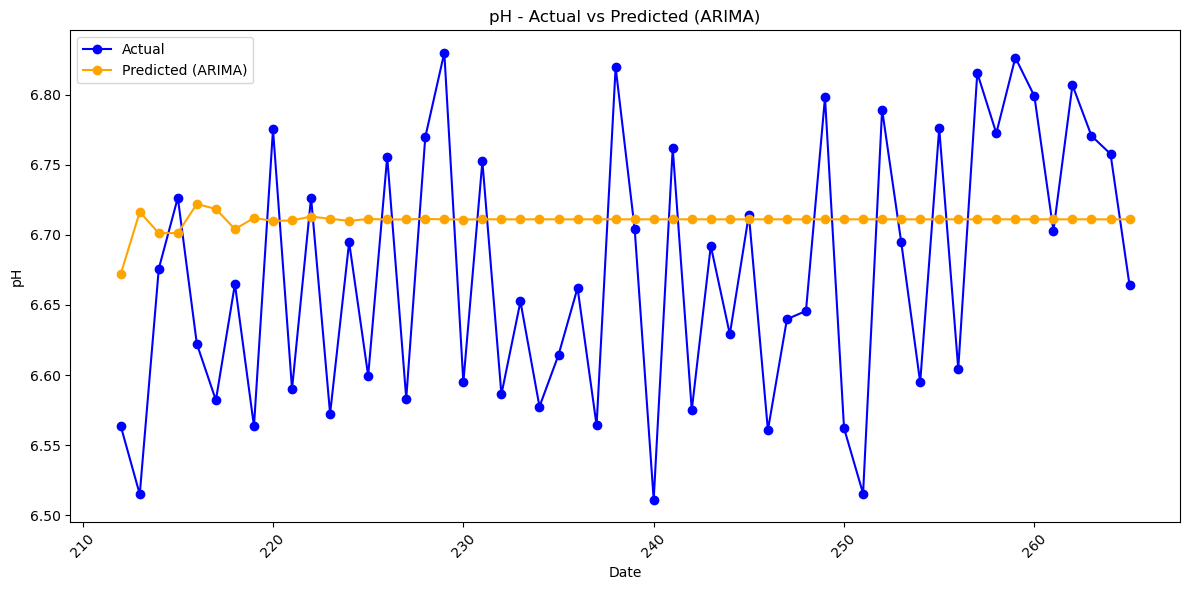

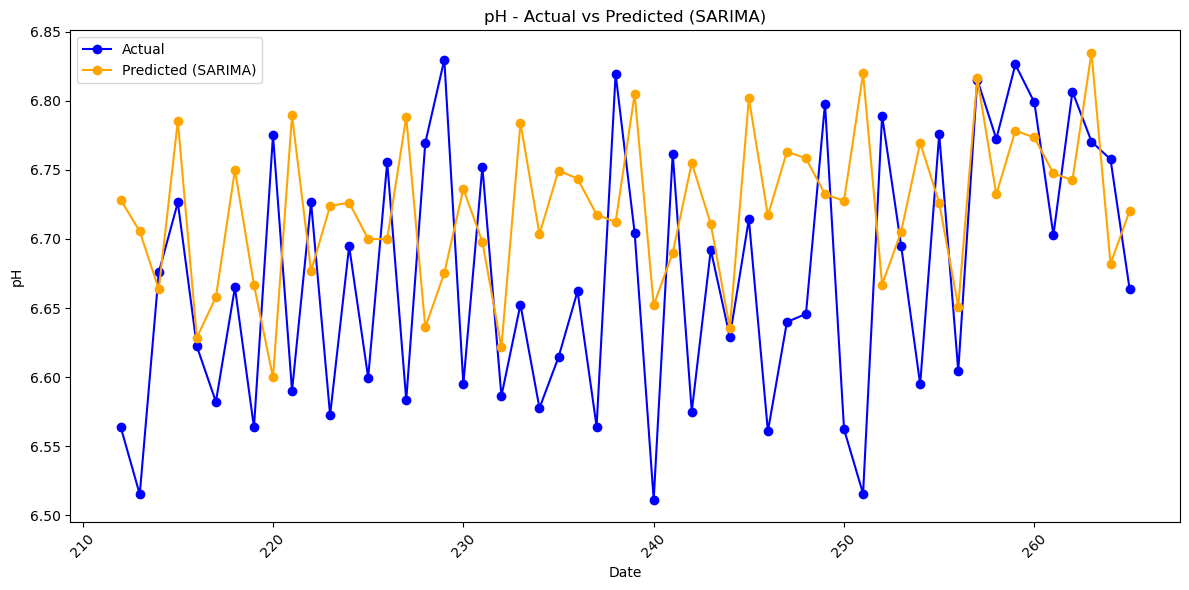

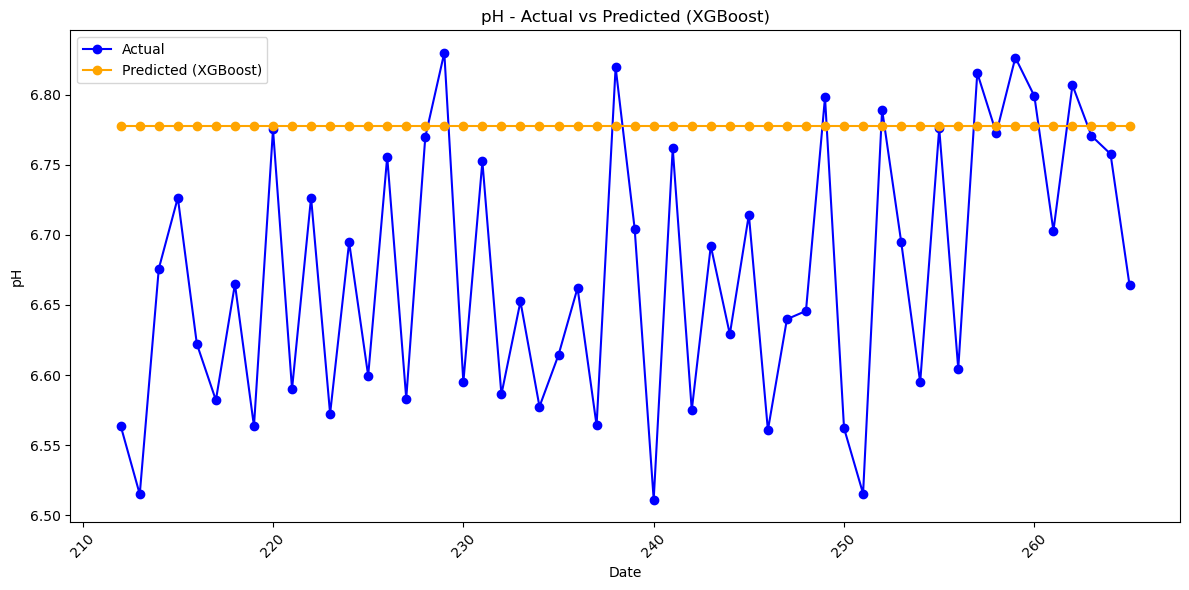

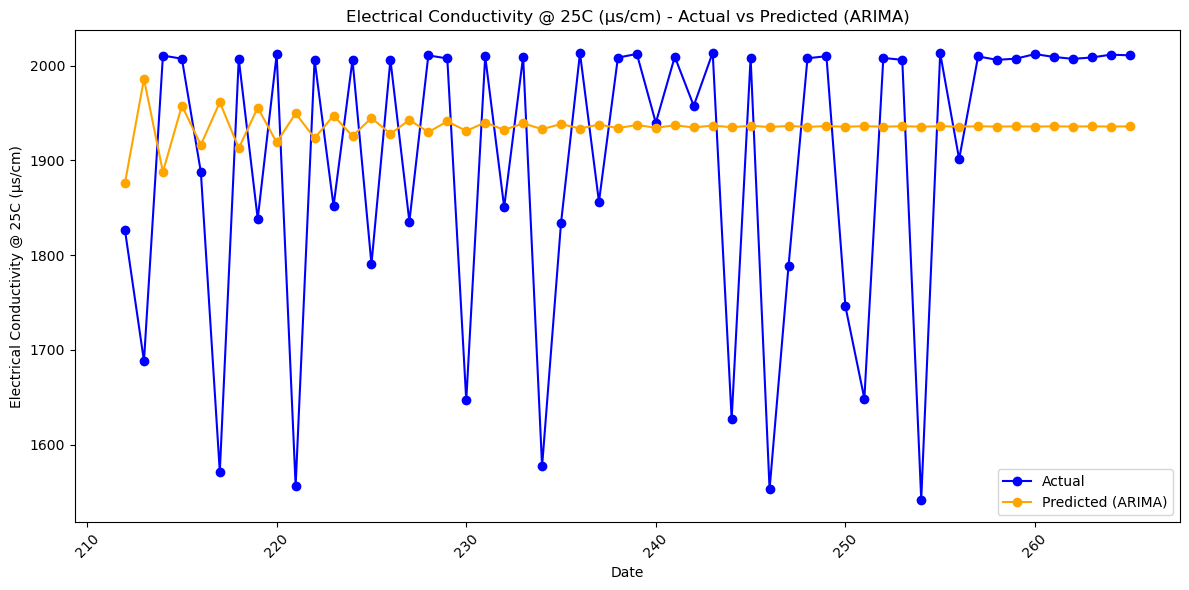

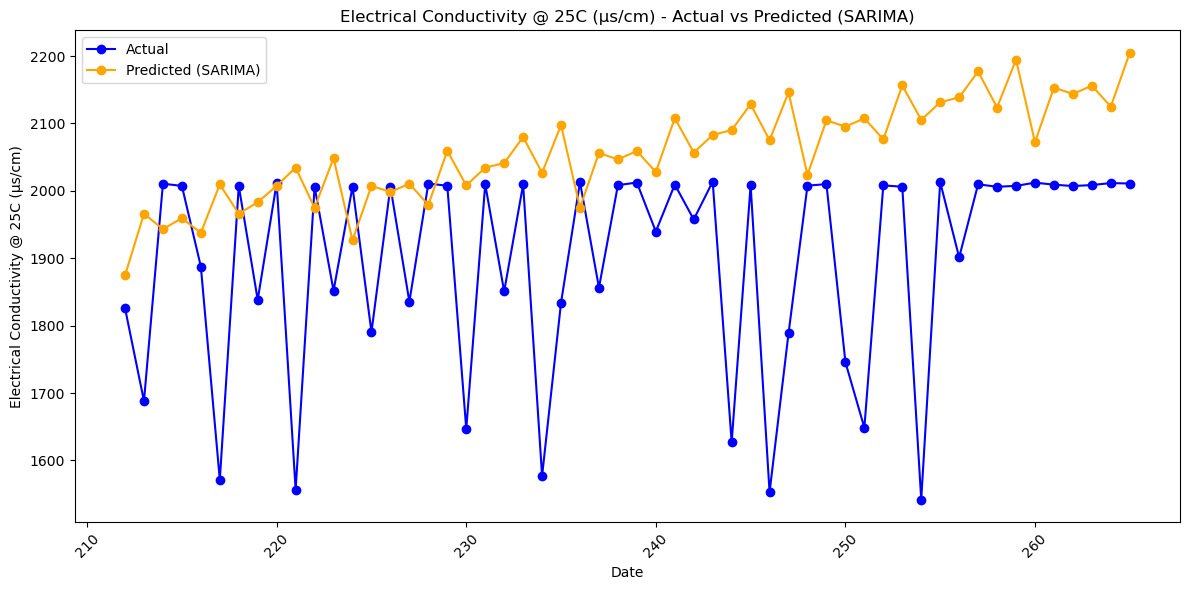

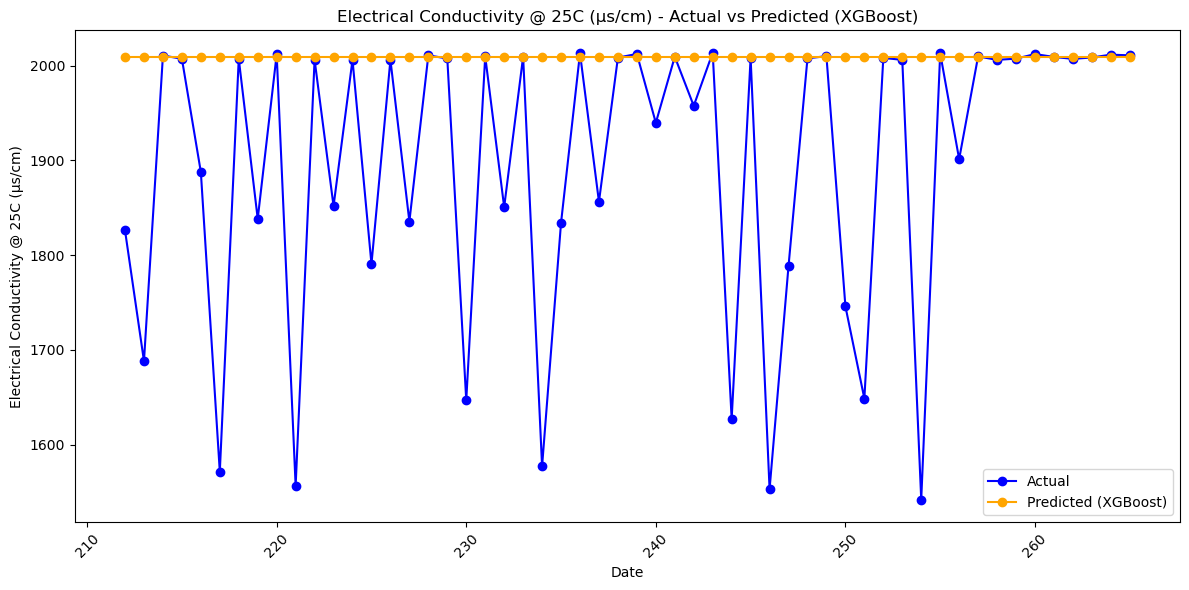

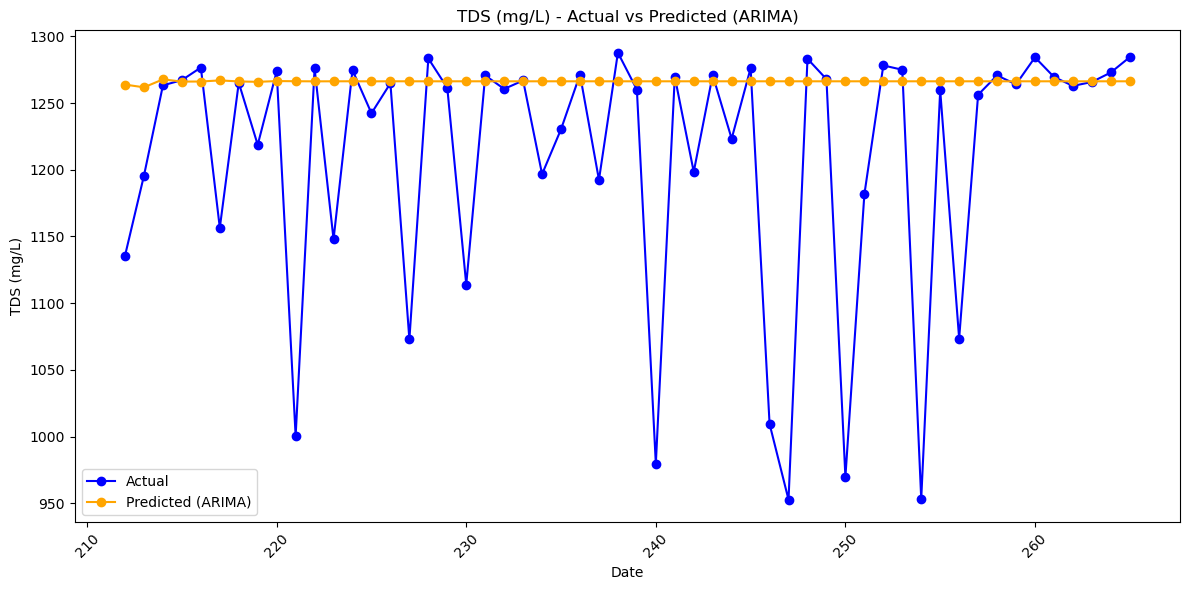

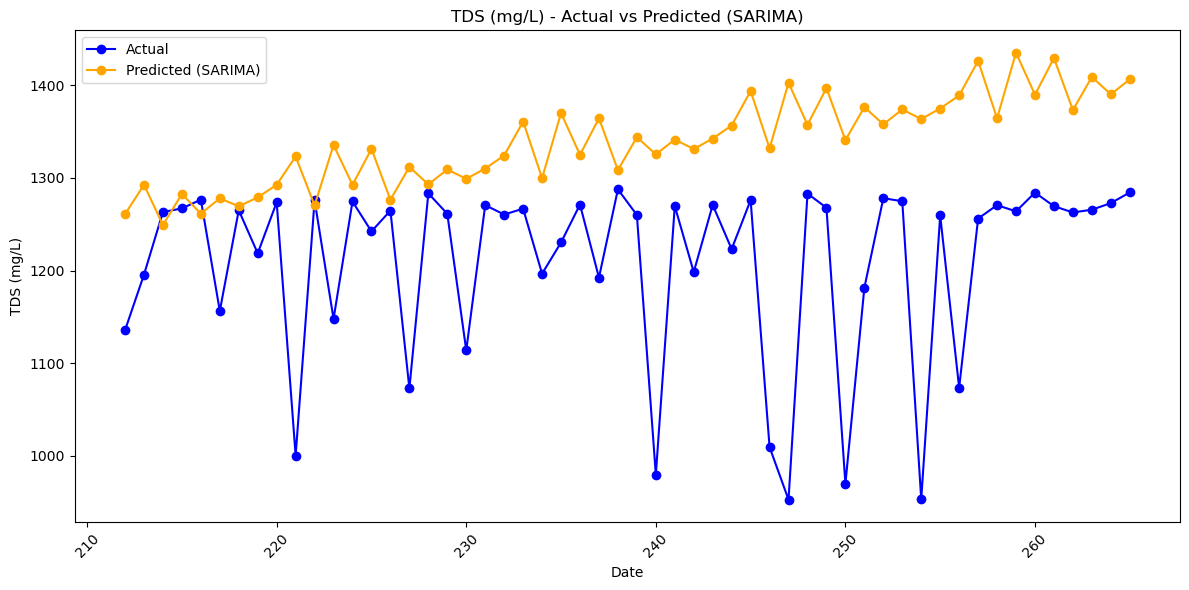

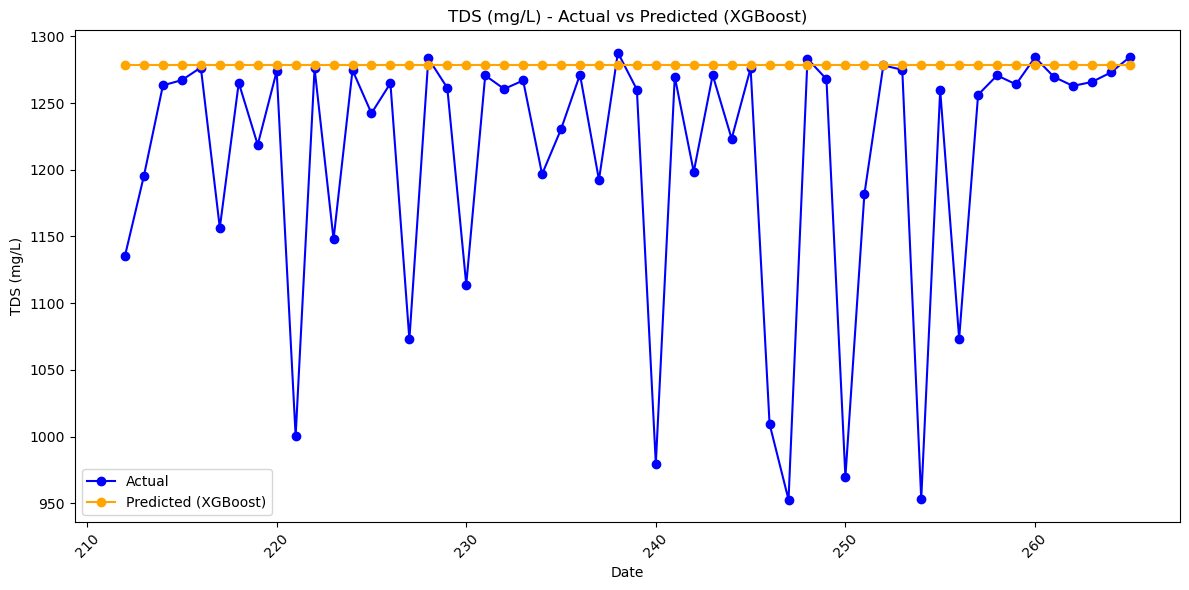

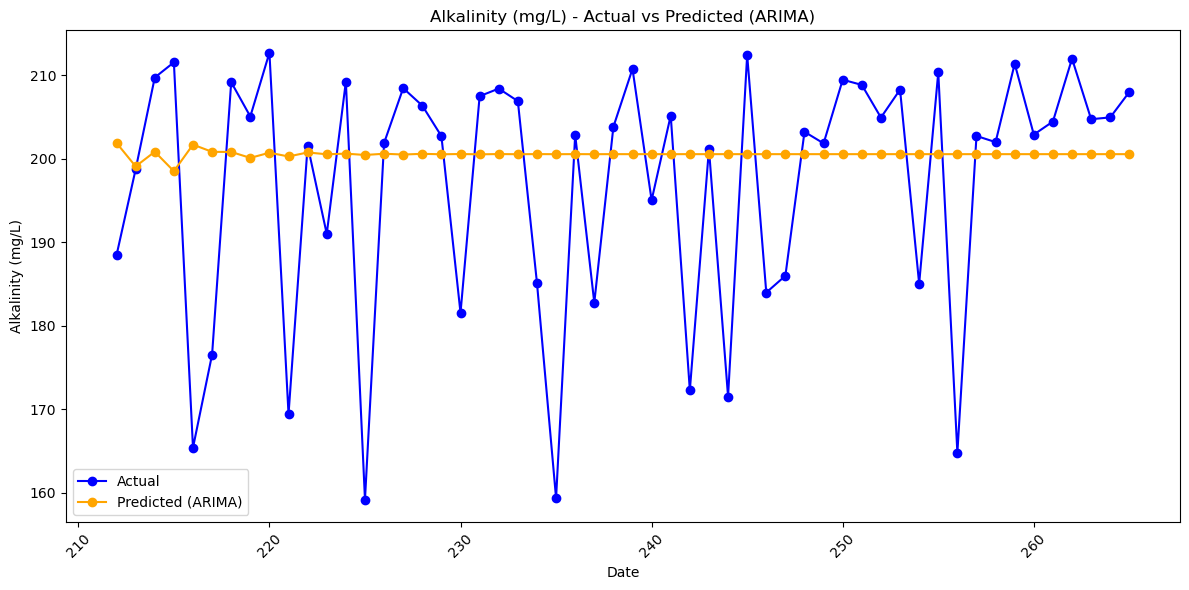

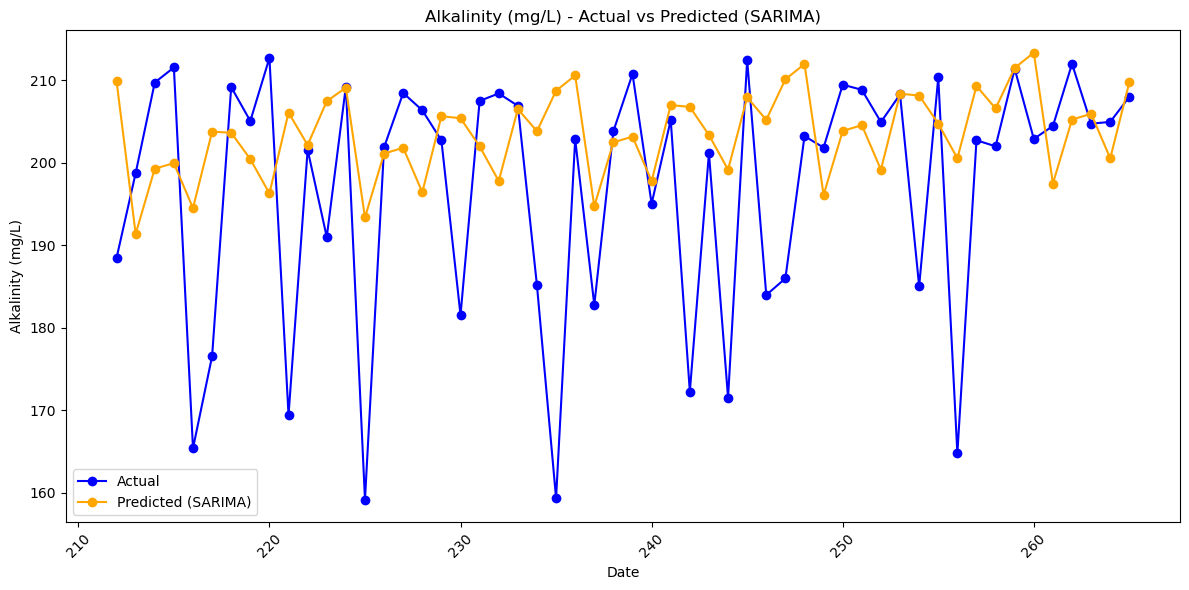

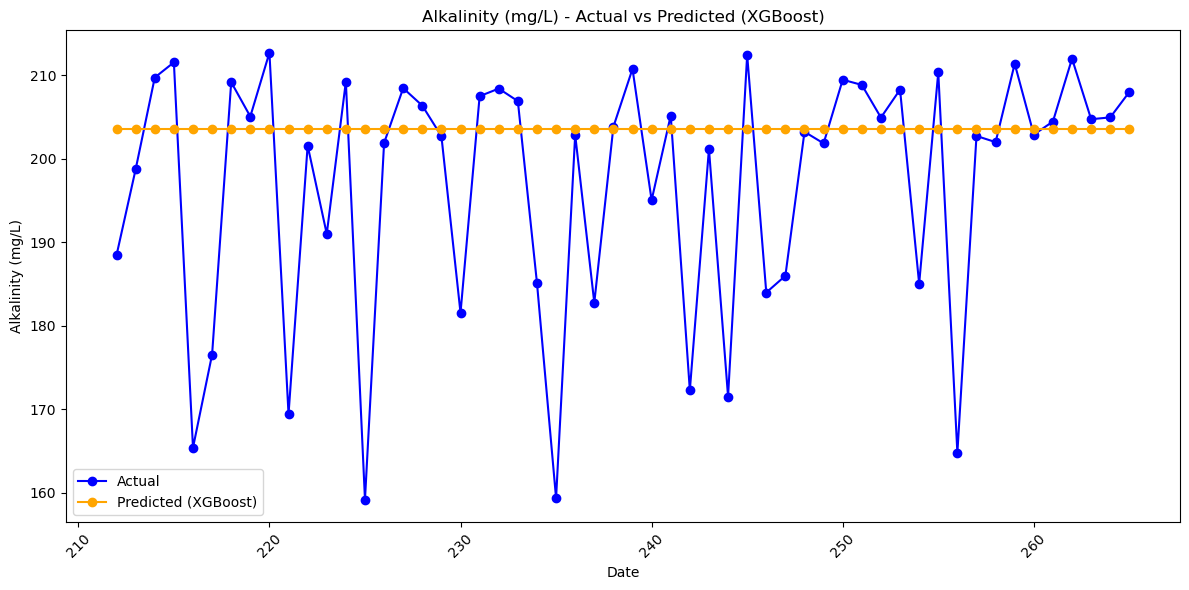

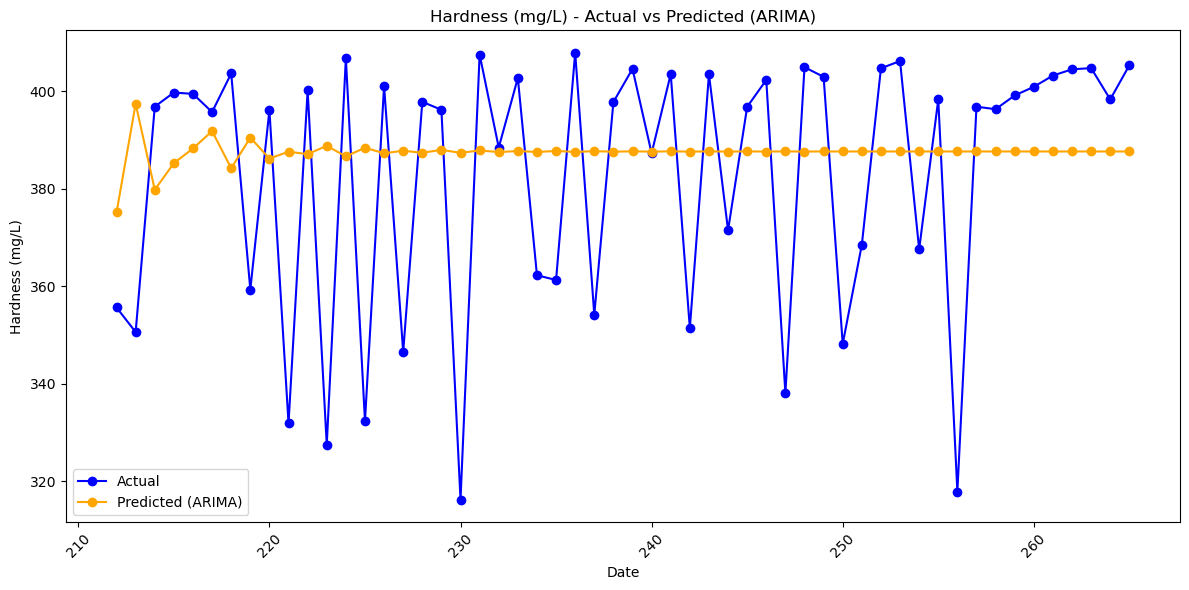

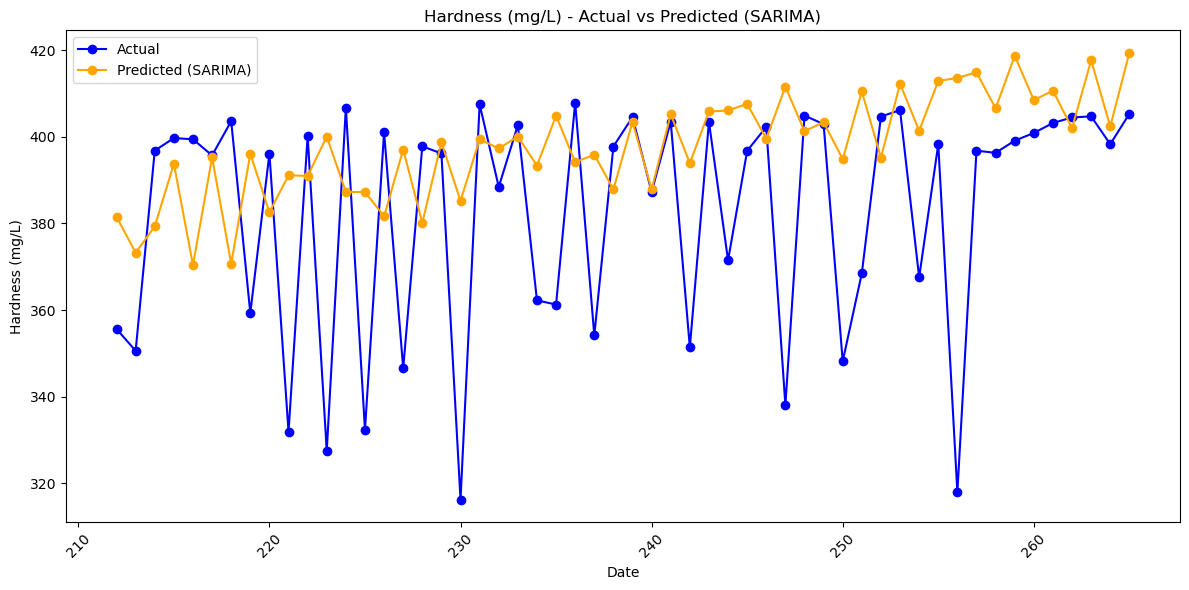

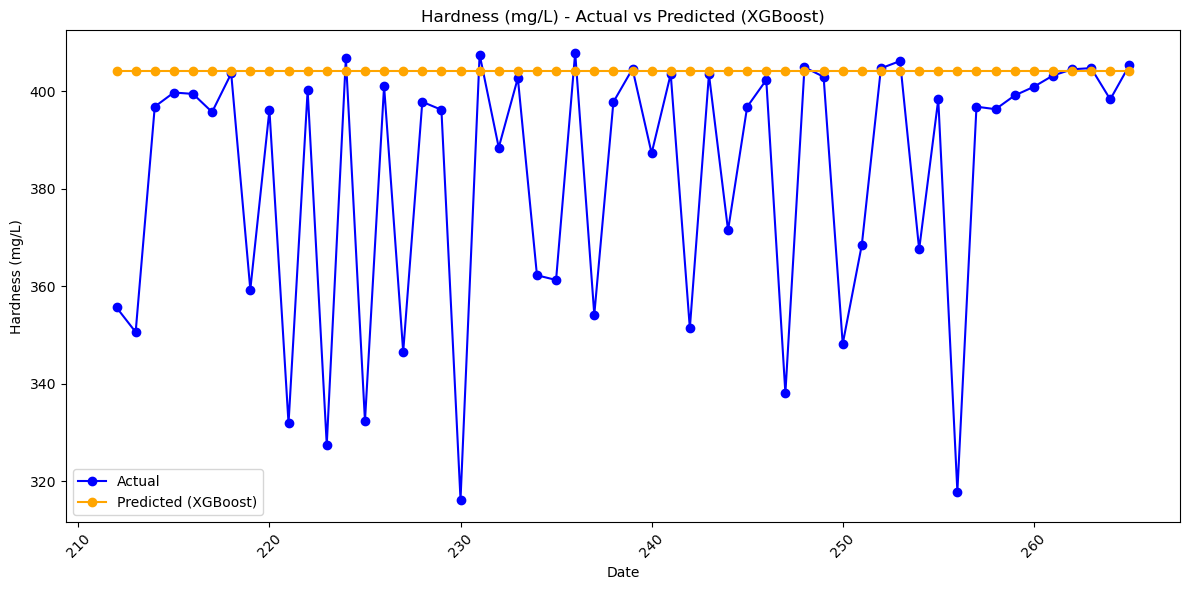

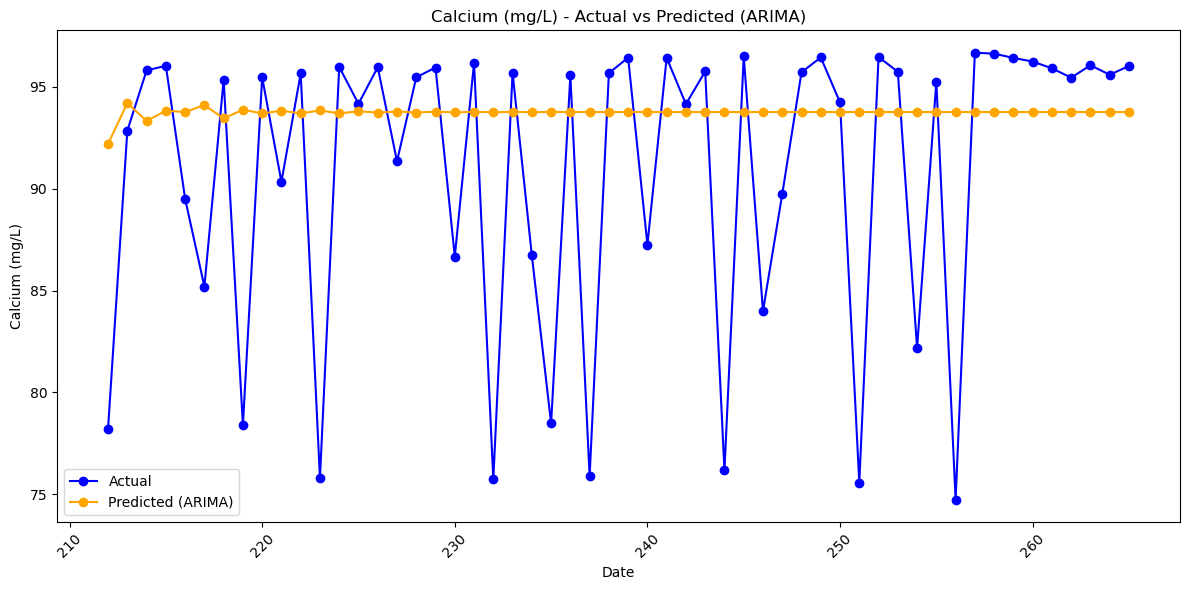

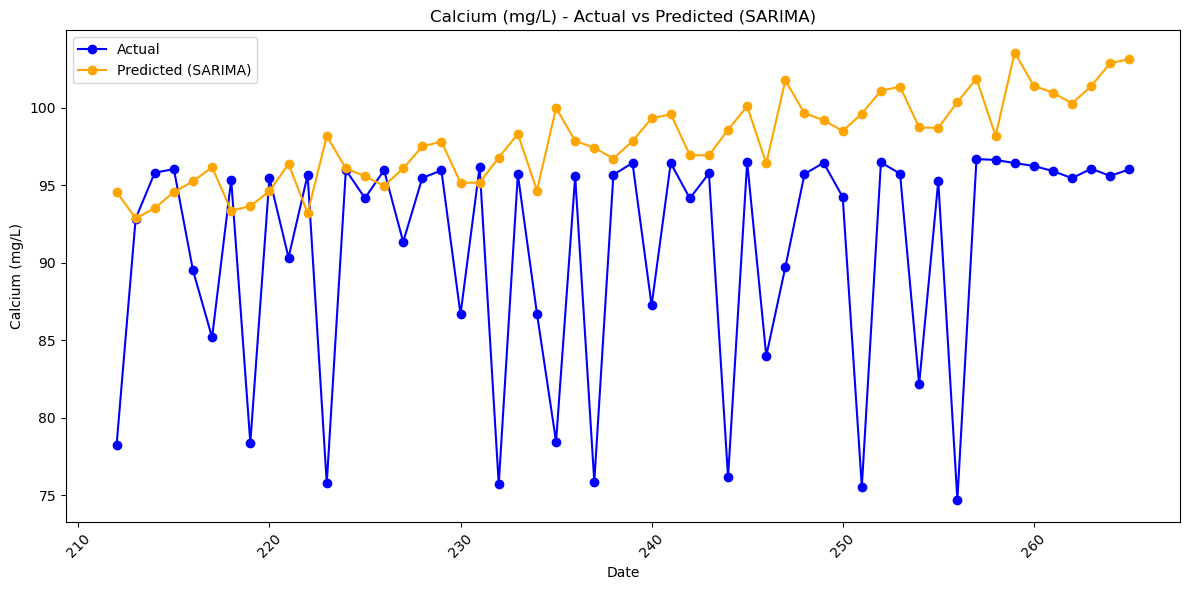

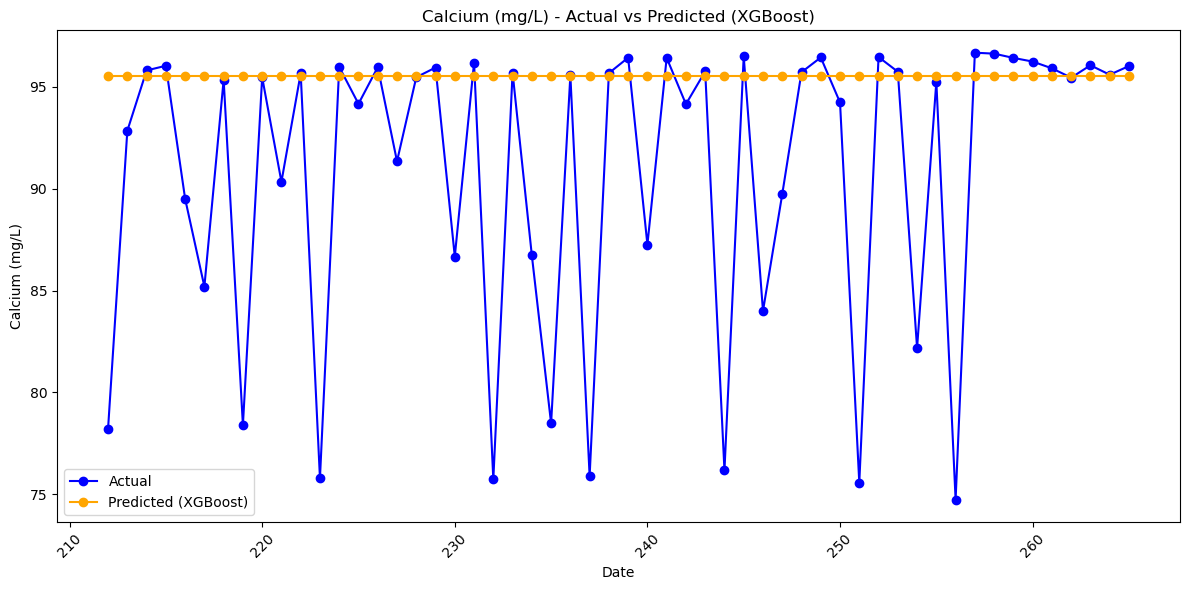

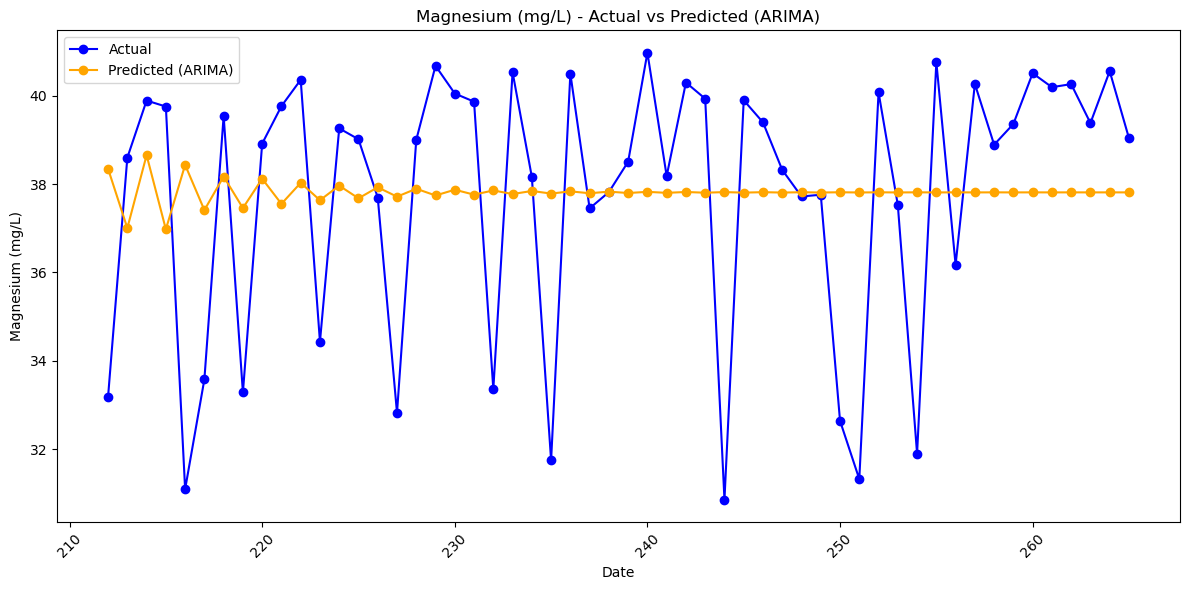

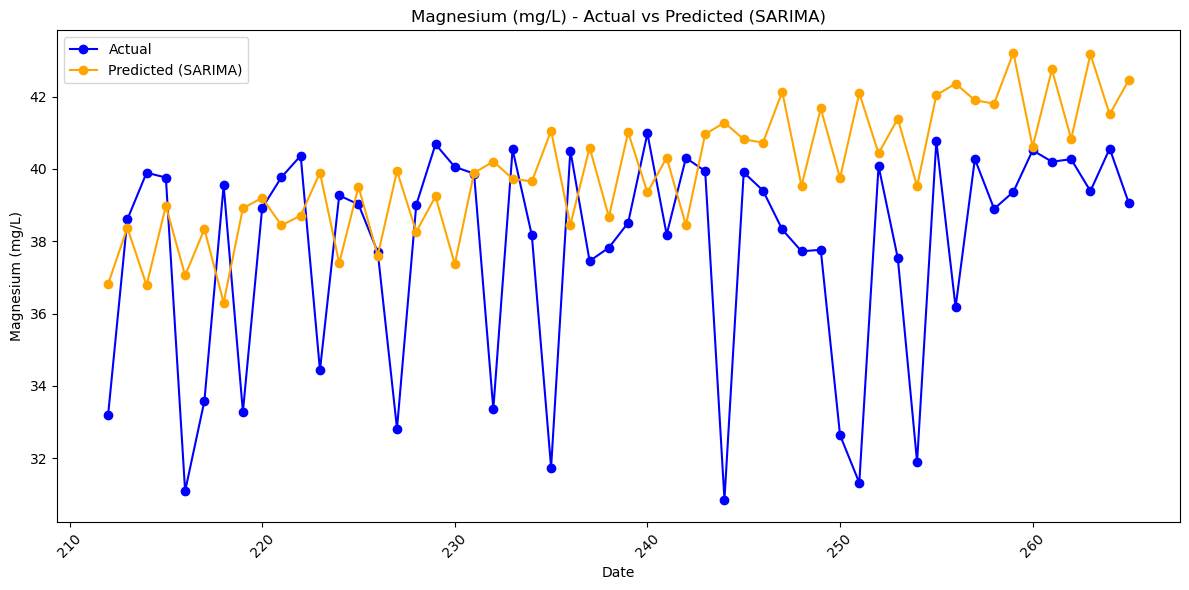

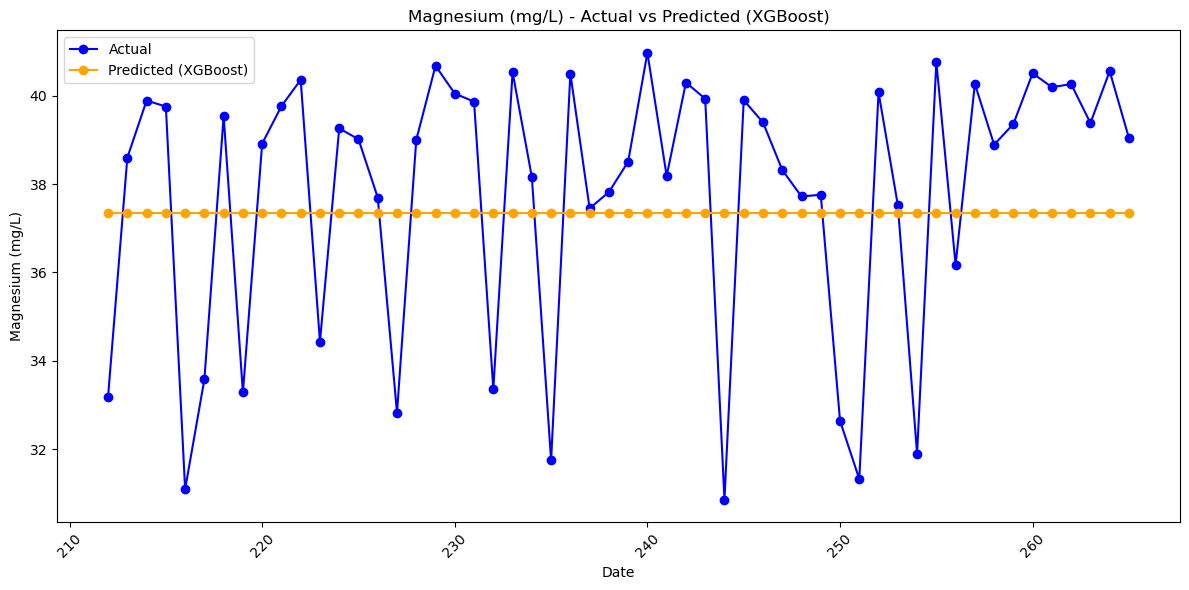

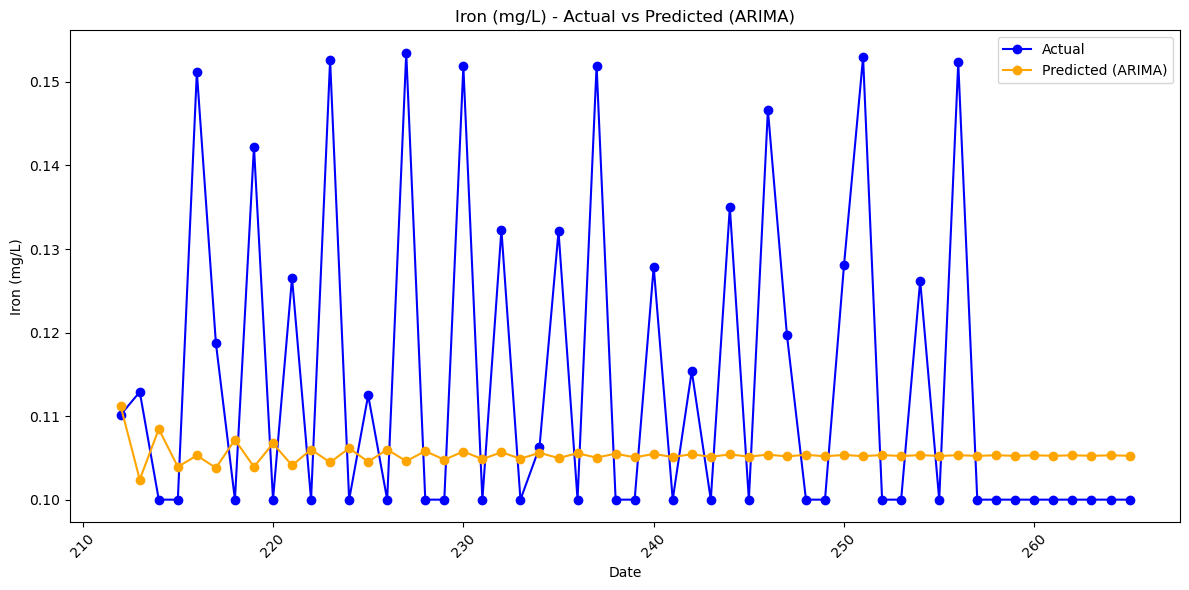

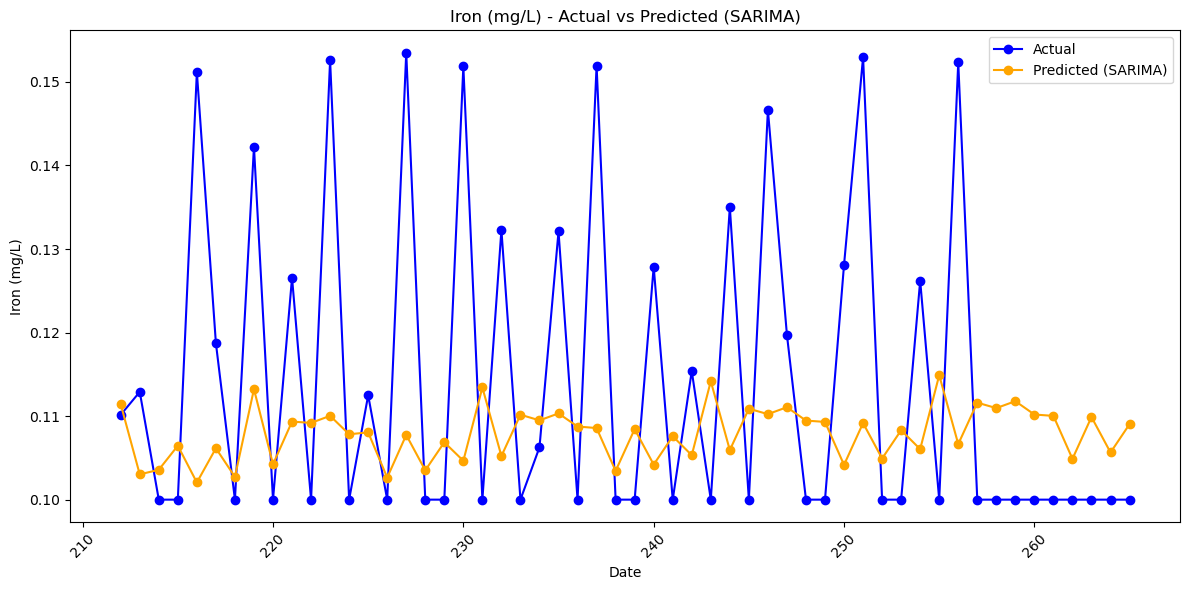

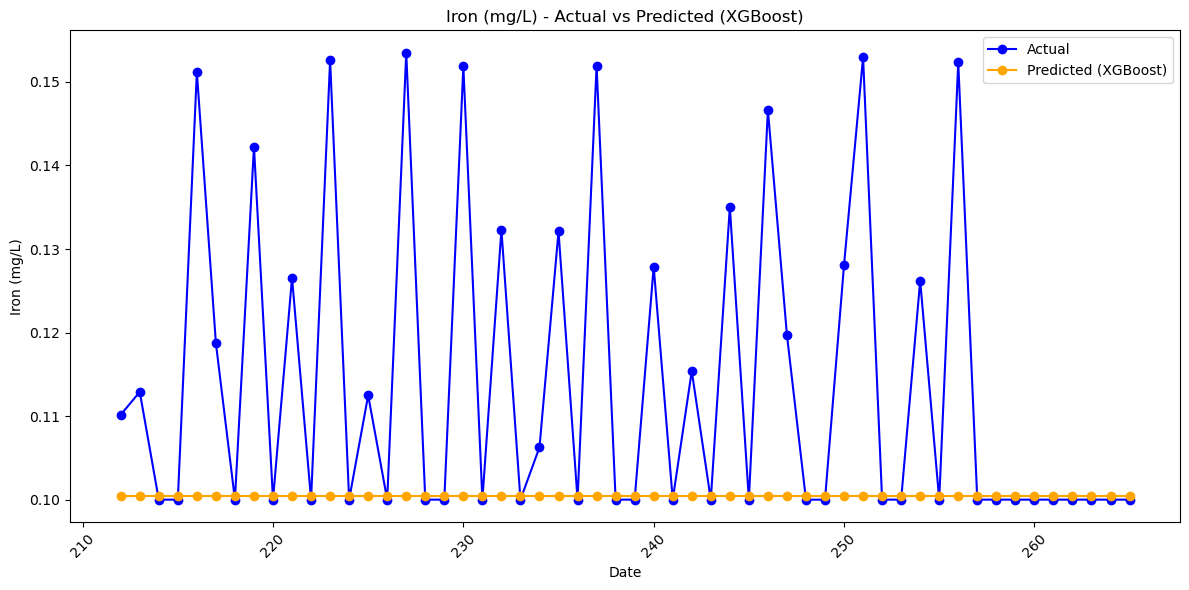

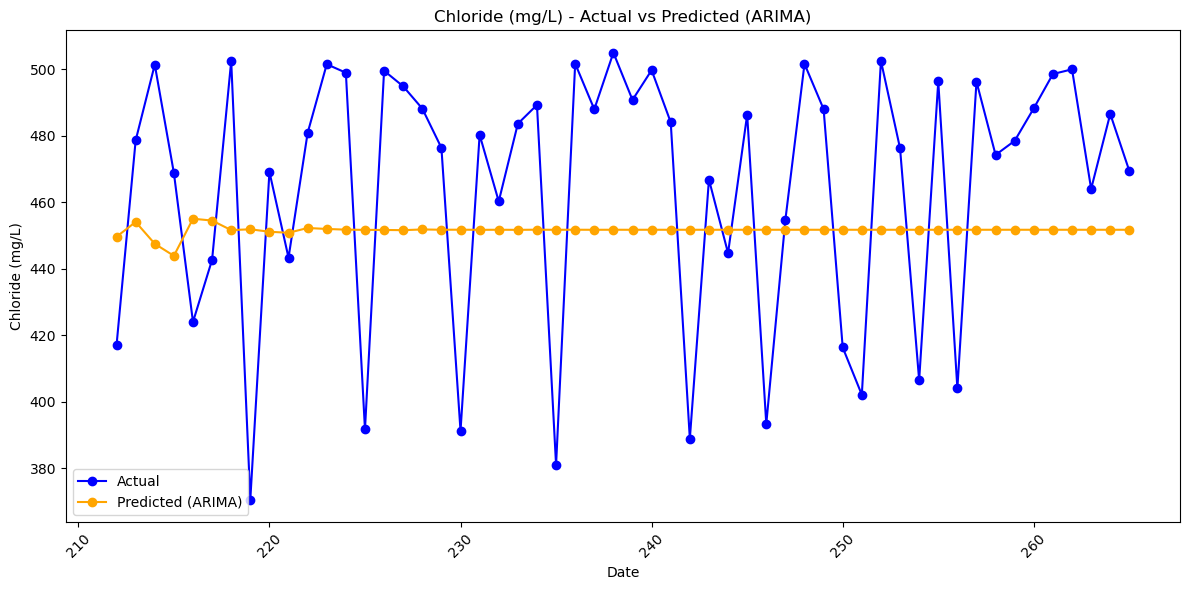

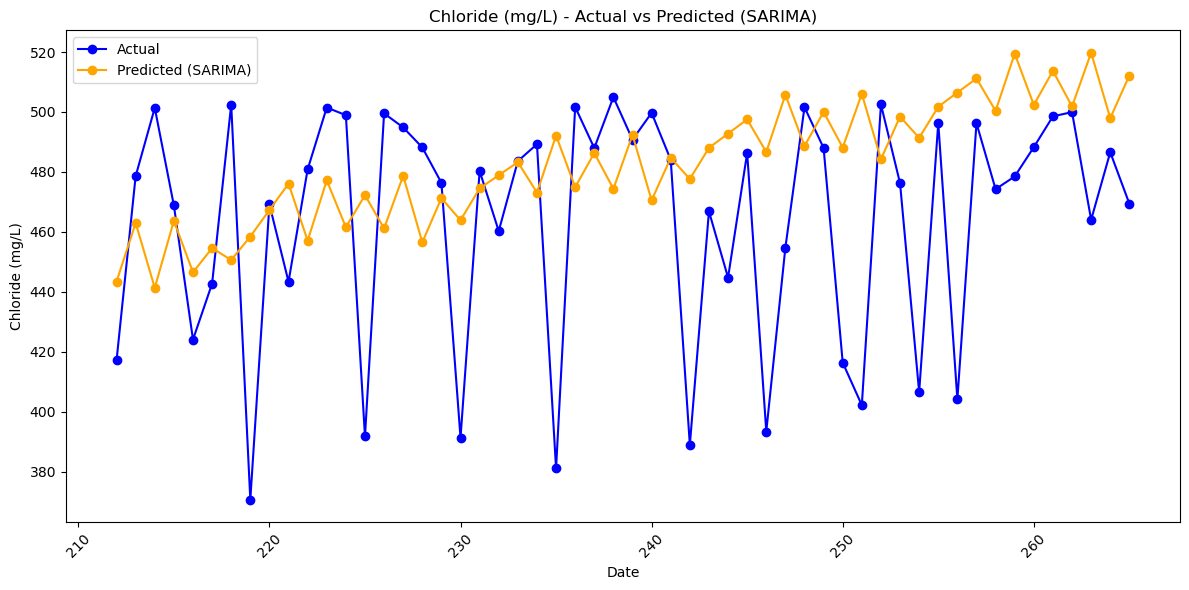

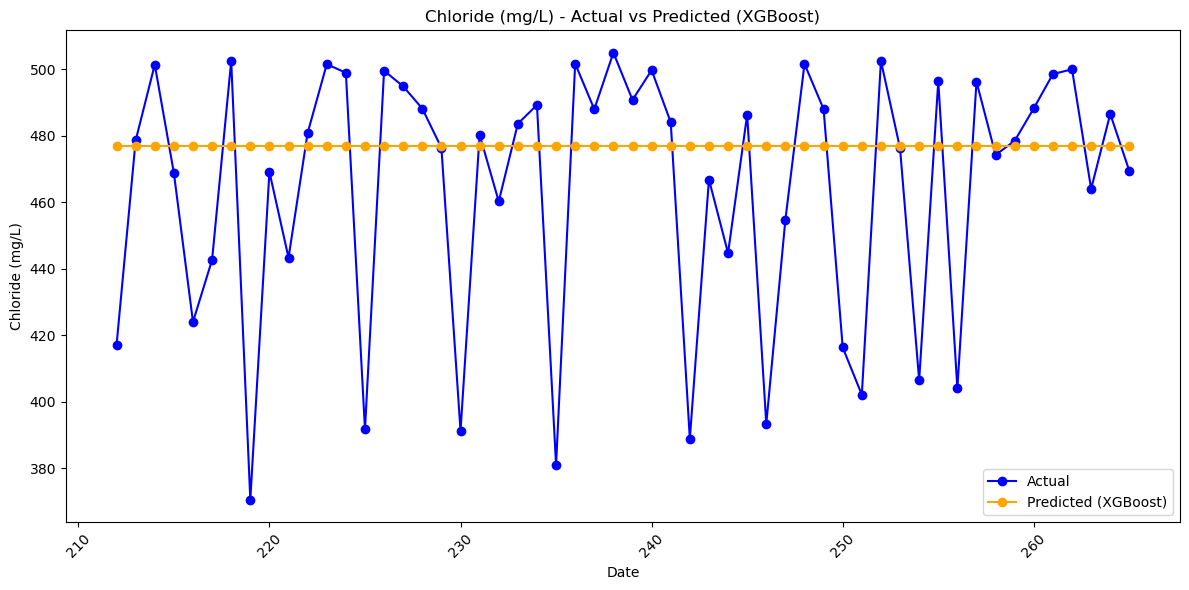

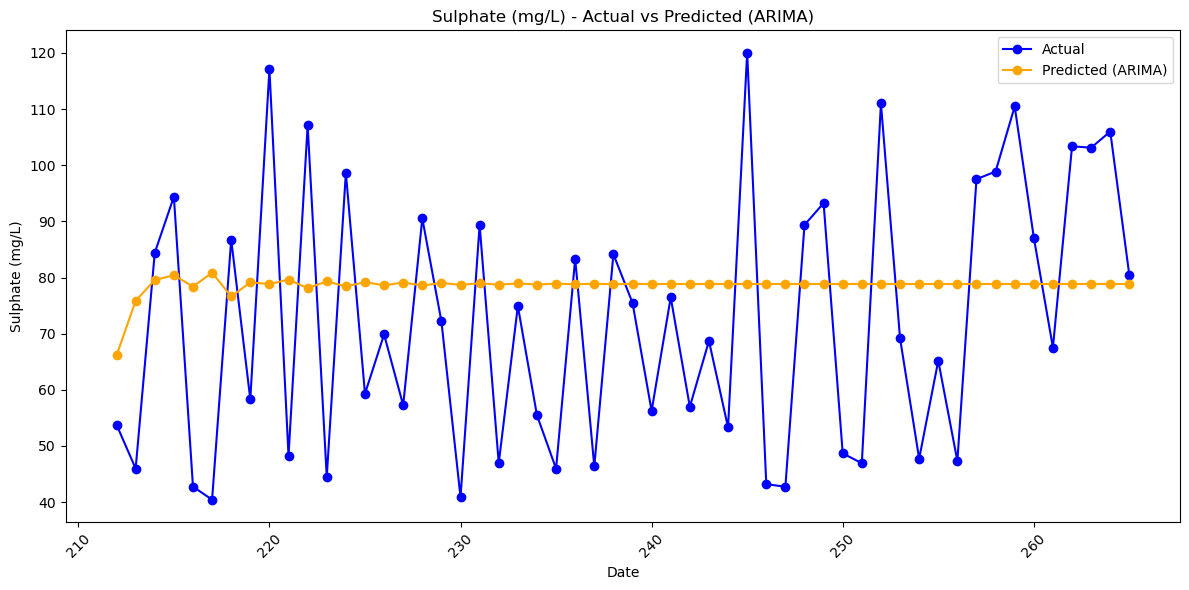

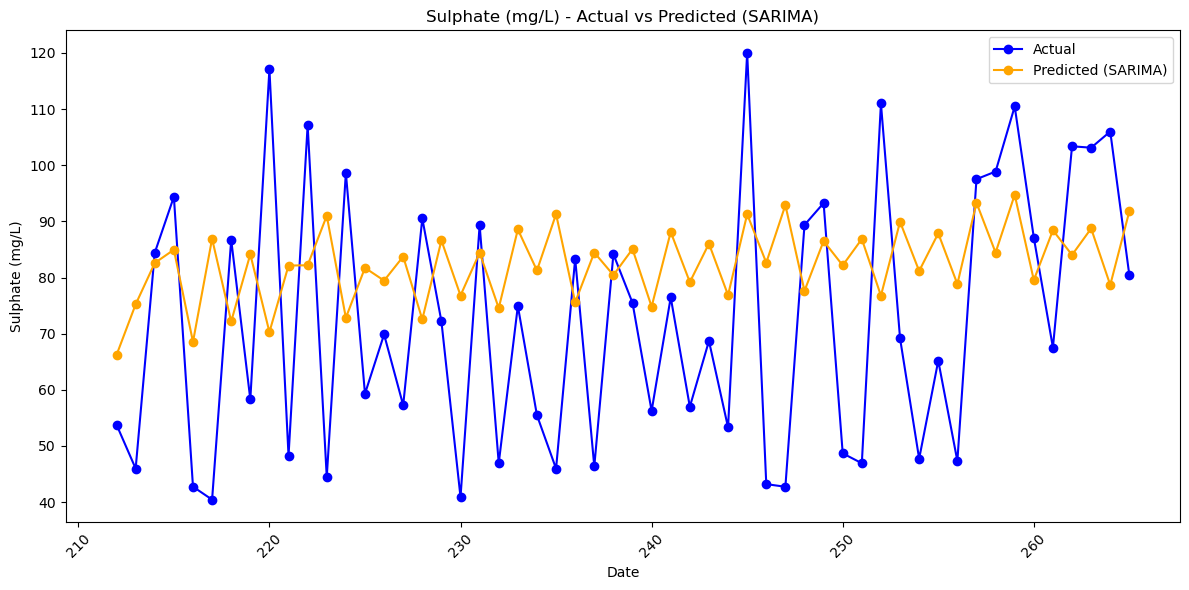

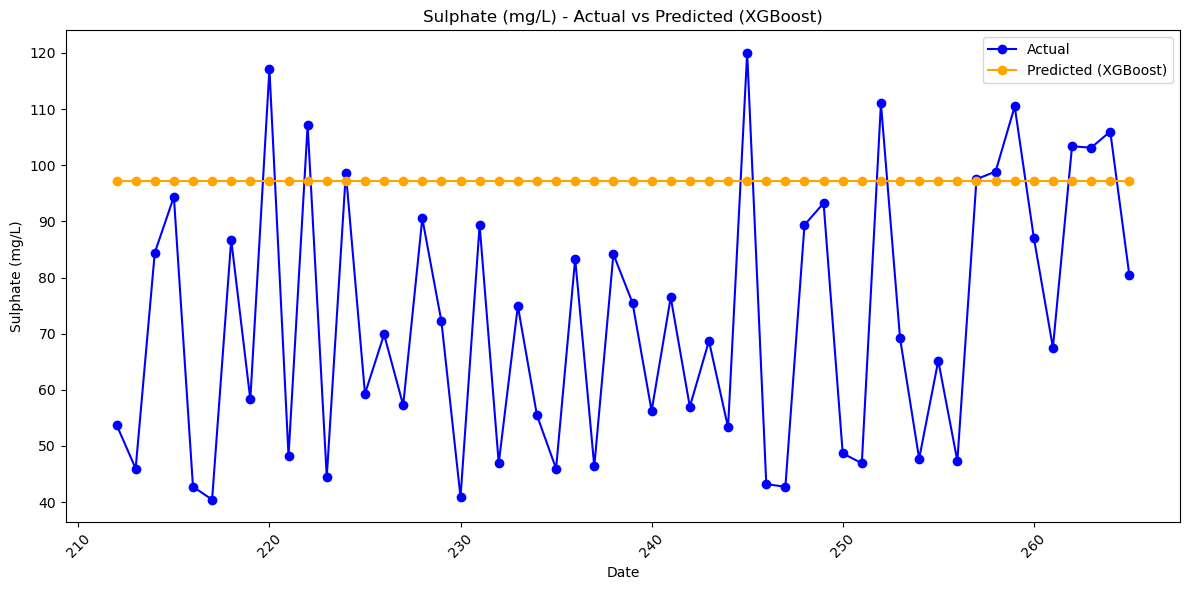

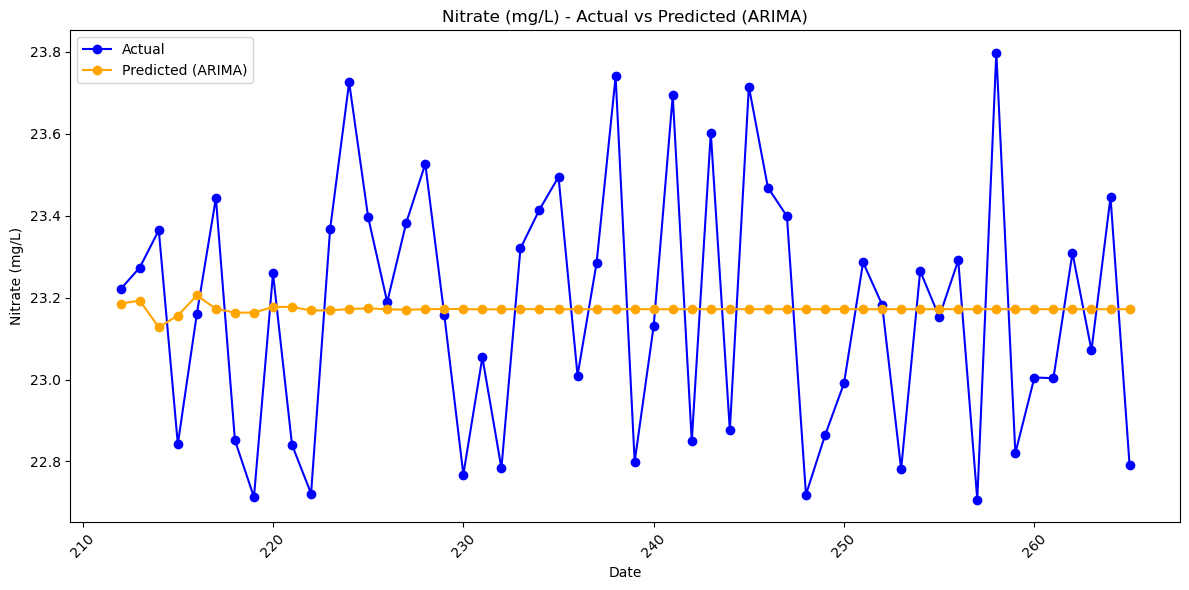

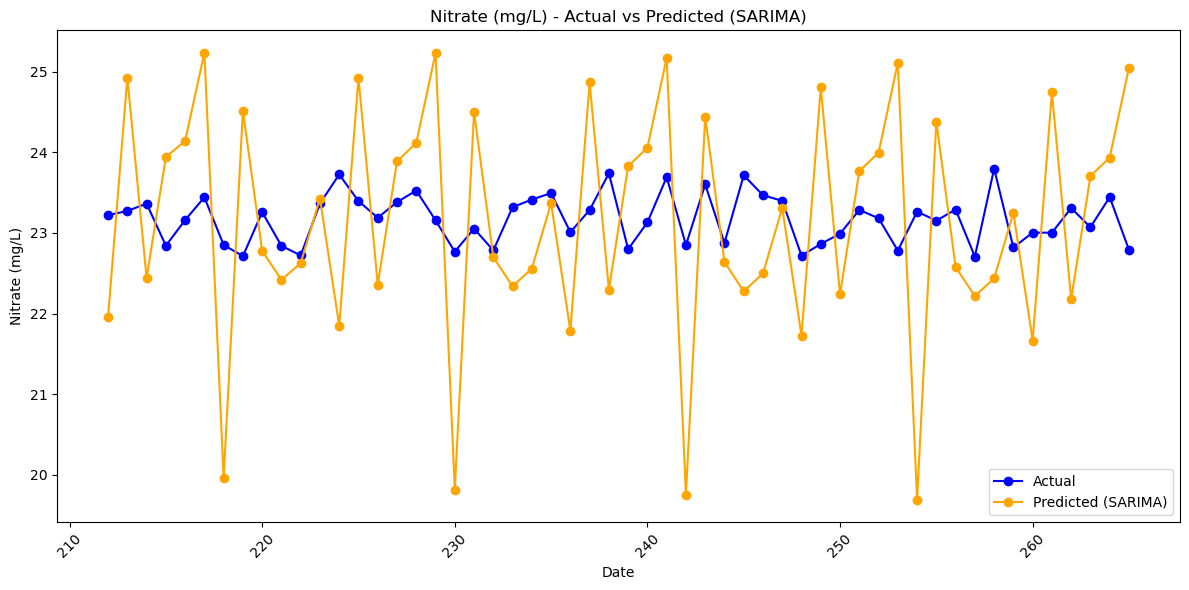

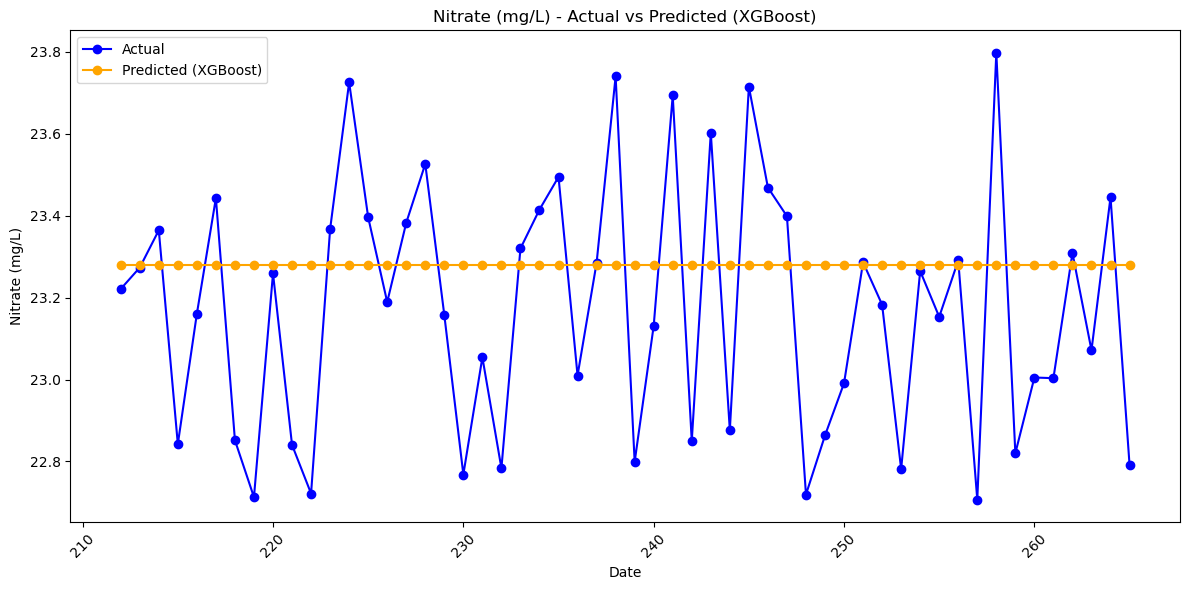

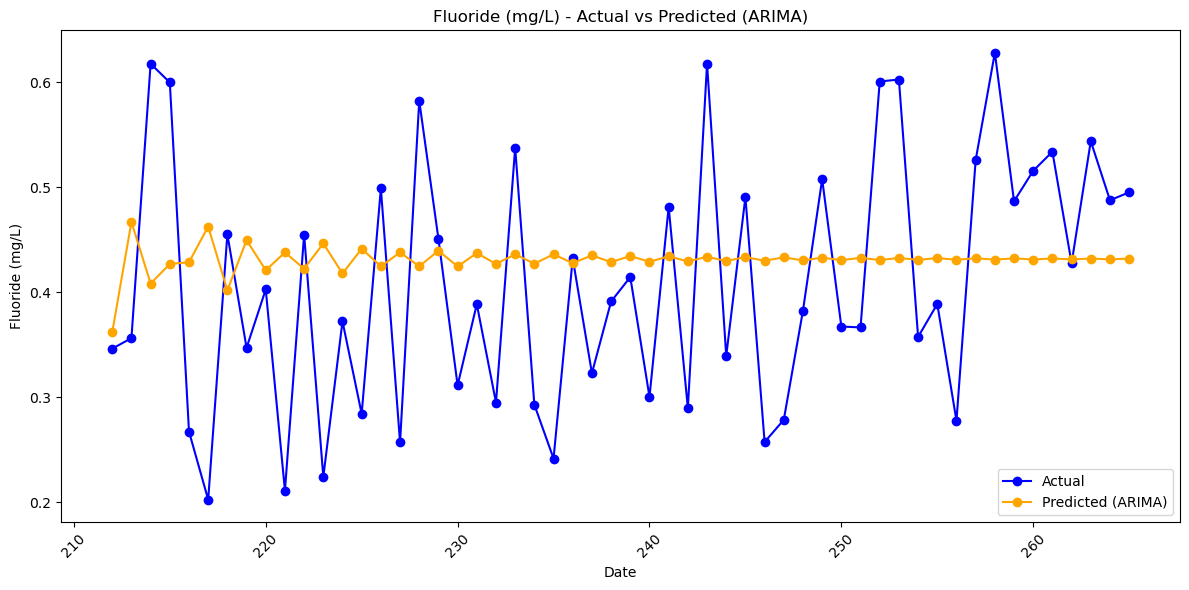

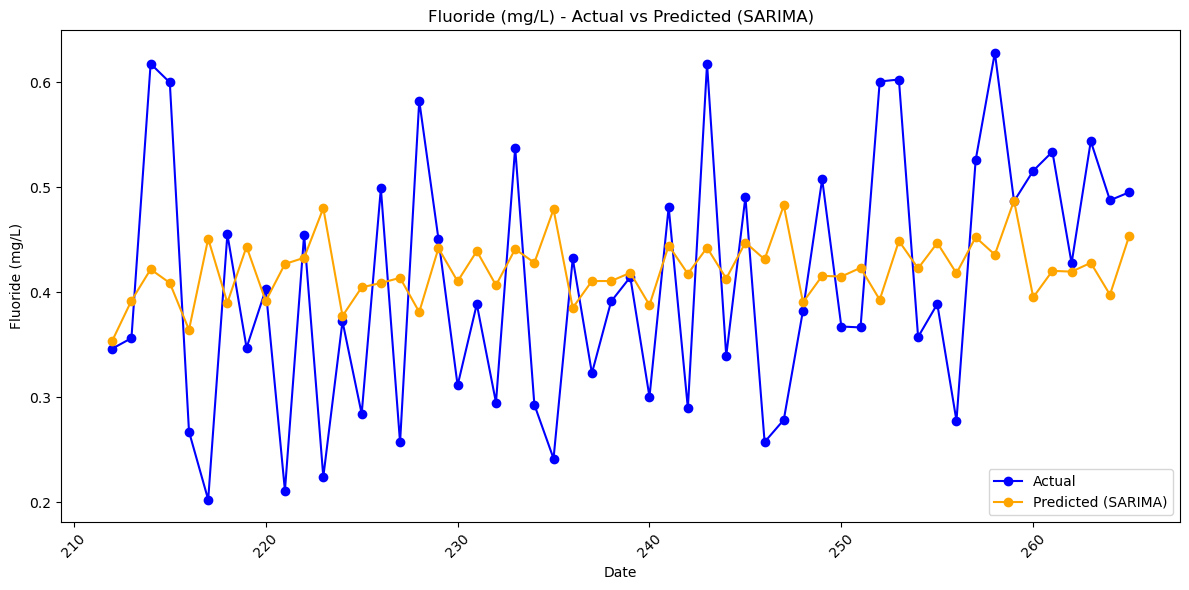

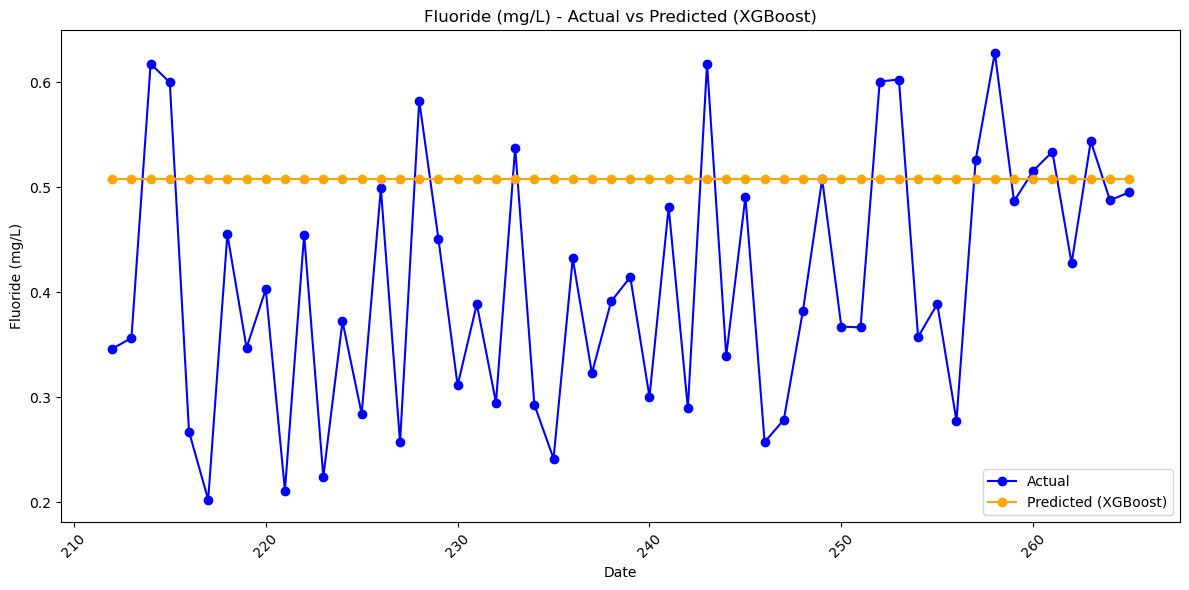

In [ ]:
# Define a function to plot actual and predicted values for each model
def plot_actual_vs_predicted(df, column, actual_data, predicted_data, model_name):
    plt.figure(figsize=(12, 6))
    actual_data = actual_data[-len(predicted_data):]  # Slice actual data to match predicted data length
    plt.plot(df.index[-len(predicted_data):], actual_data, marker='o', color='blue', label='Actual')
    plt.plot(df.index[-len(predicted_data):], predicted_data, marker='o', color='orange', label='Predicted (' + model_name + ')')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(column + ' - Actual vs Predicted (' + model_name + ')')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot actual vs predicted values for each column and model
for column, results in evaluation_results.items():
    actual_data = df[column].values[-len(results['ARIMA'][0]):]  # Slice actual data to match predicted data length
    for model_name, model_results in results.items():
        predicted_data = model_results[0]
        print(df, column, actual_data, predicted_data, model_name)
        plot_actual_vs_predicted(df, column, actual_data, predicted_data, model_name)

